In [86]:
import pandas as pd
import copy
import spacy

import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
nlp = spacy.load('de_core_news_md')

all_party_textes_df = pd.read_parquet("all_parties_text_combined.parquet")
Labled_theses_df = pd.read_csv('wahlomaten_thesen_positionen.csv')

In [88]:
lable_colums_list = Labled_theses_df.columns[1:].tolist()

replace_dict = {
    'spd'   :   'SPD', 
    'cdu'   :   'CDU / CSU', 
    'gruene':   'GRÜNE', 
    'afd'   :   'AfD',
    'fdp'   :   'FDP', 
    'linke' :   'Die Linke'
}

all_party_textes_df['Party'] = all_party_textes_df['Party'].replace(replace_dict)
del replace_dict

In [89]:

parties_list = all_party_textes_df['Party'].unique().tolist()
Labled_theses_list = Labled_theses_df['These'].tolist()
predicted_theses_df = copy.deepcopy(Labled_theses_df)

In [90]:
parties_list

['SPD', 'CDU / CSU', 'GRÜNE', 'AfD', 'FDP', 'Die Linke']

In [91]:
all_party_textes_df['Chapter'] = all_party_textes_df['Chapter'].fillna('-')

C:\Users\lnieb\AppData\Local\Temp\ipykernel_2656\1079315963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  party_df.dropna(inplace=True)


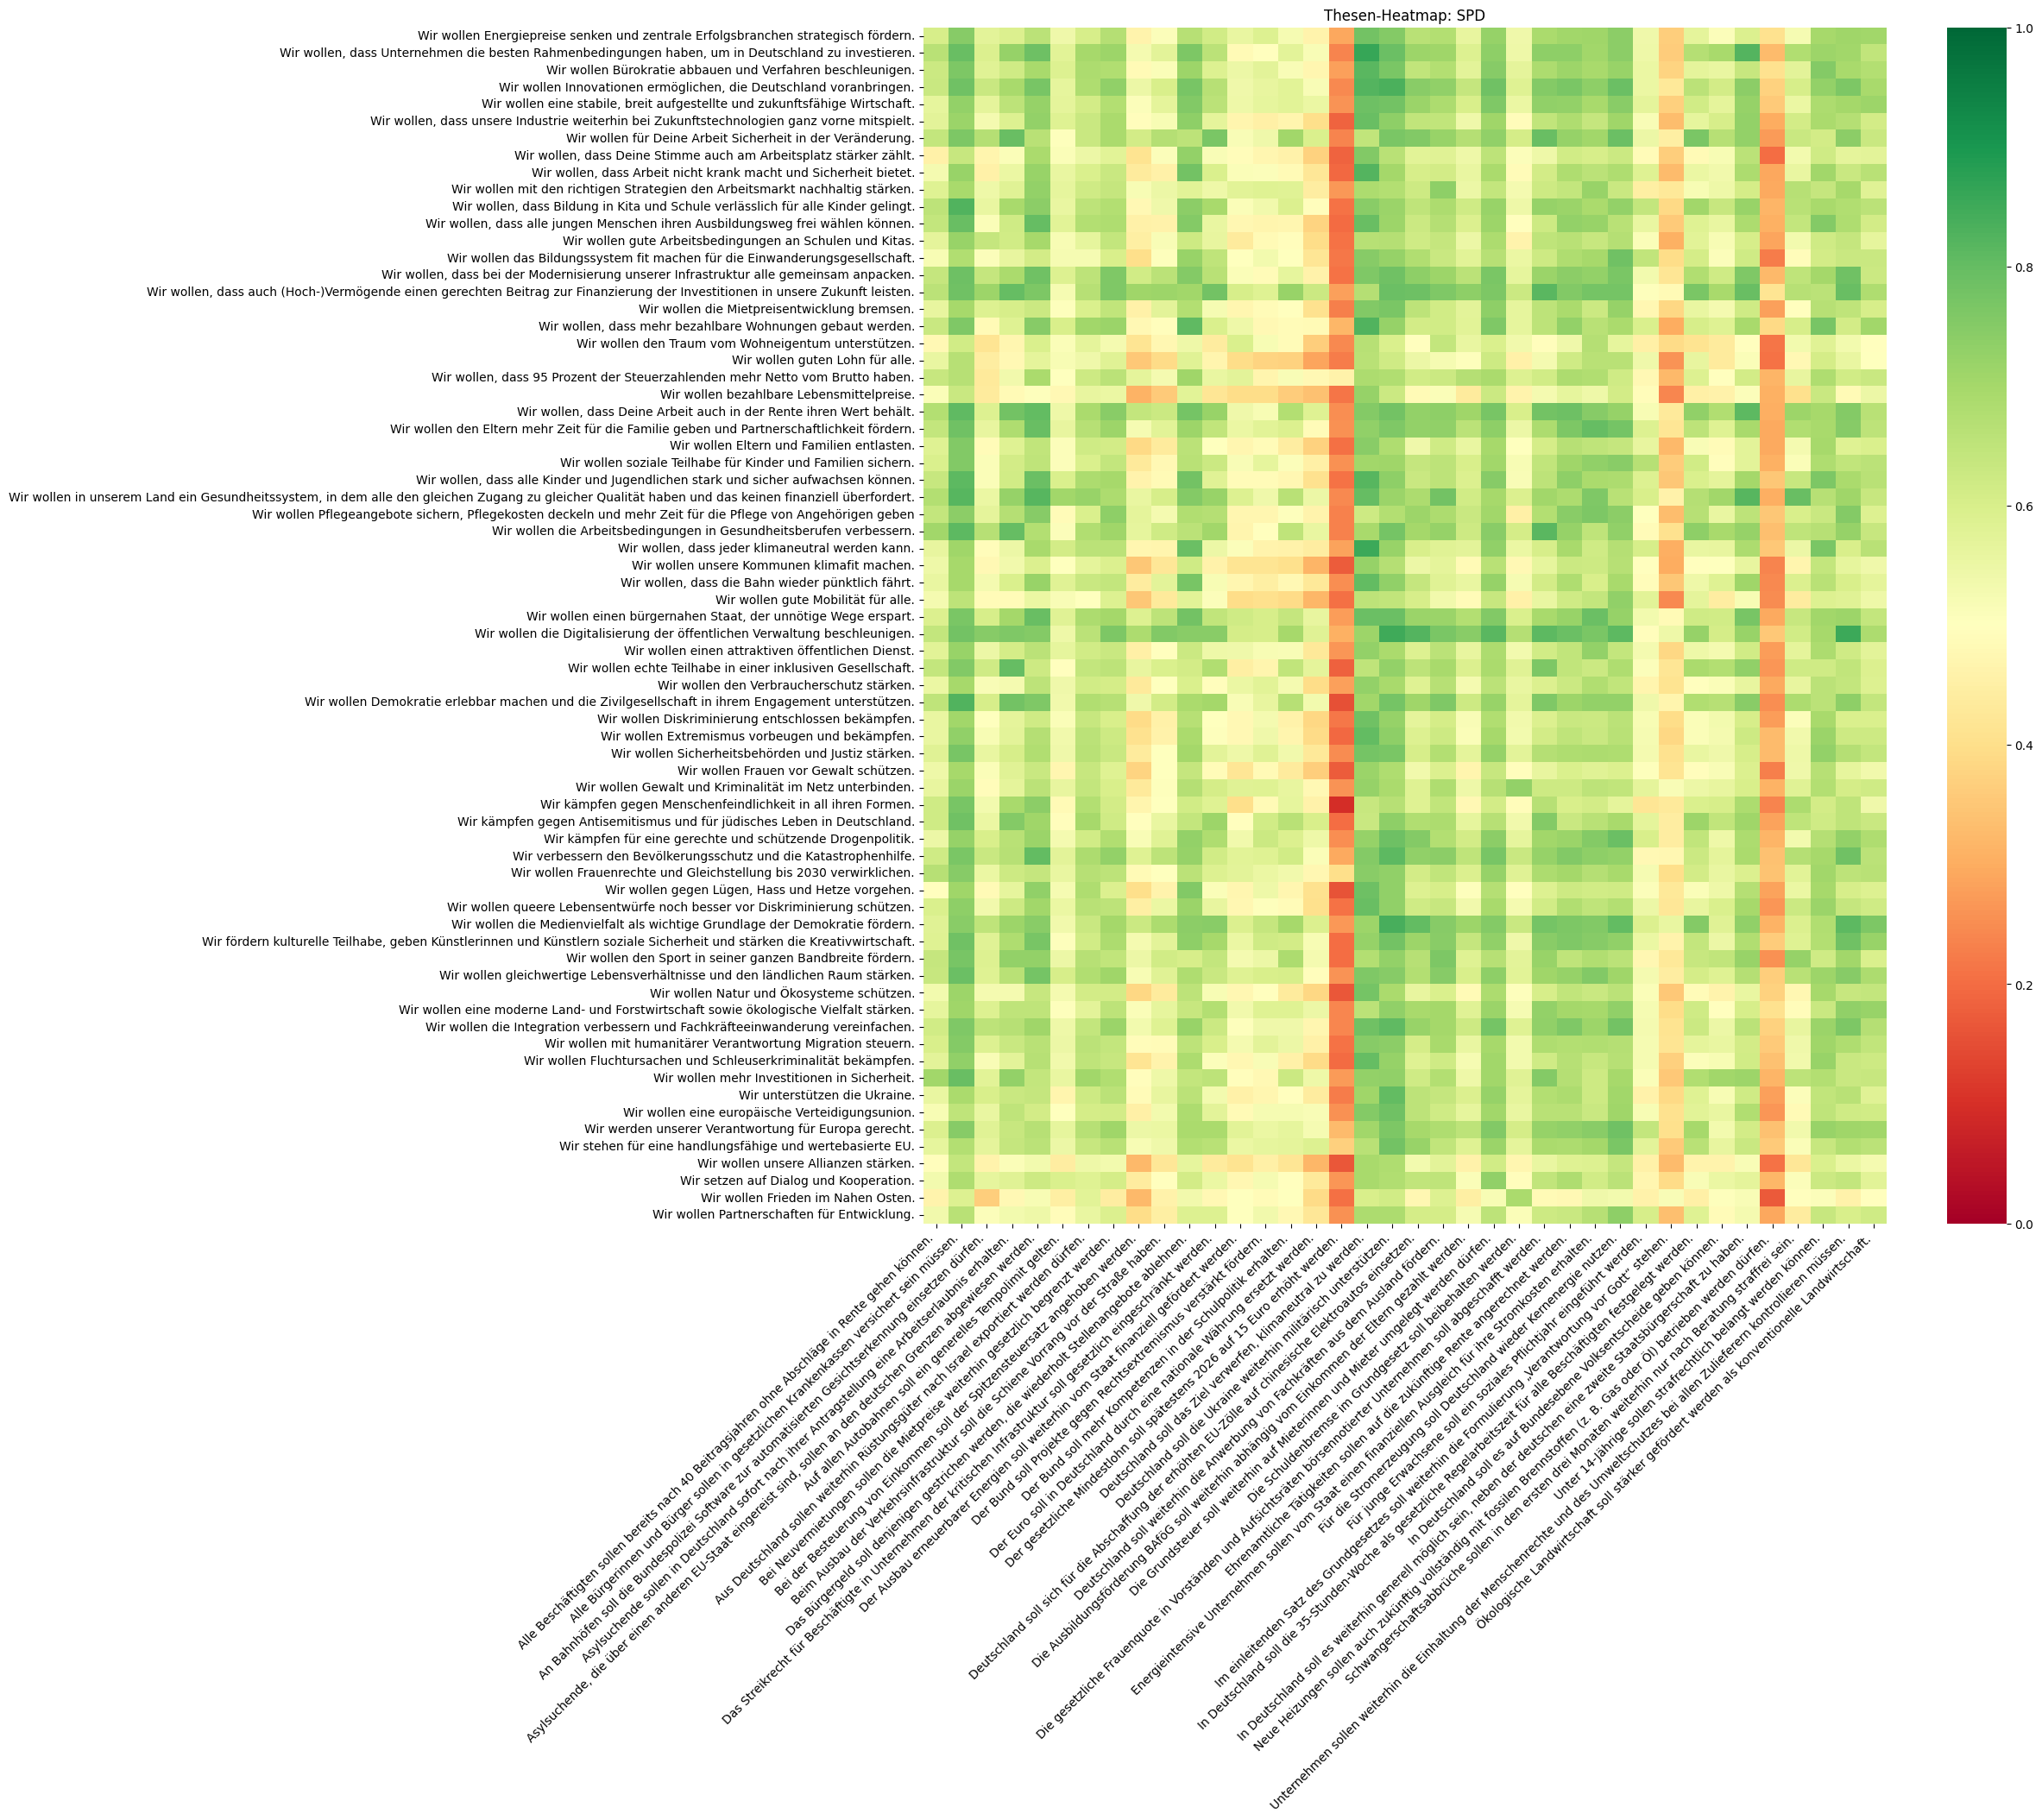

C:\Users\lnieb\AppData\Local\Temp\ipykernel_2656\1079315963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  party_df.dropna(inplace=True)


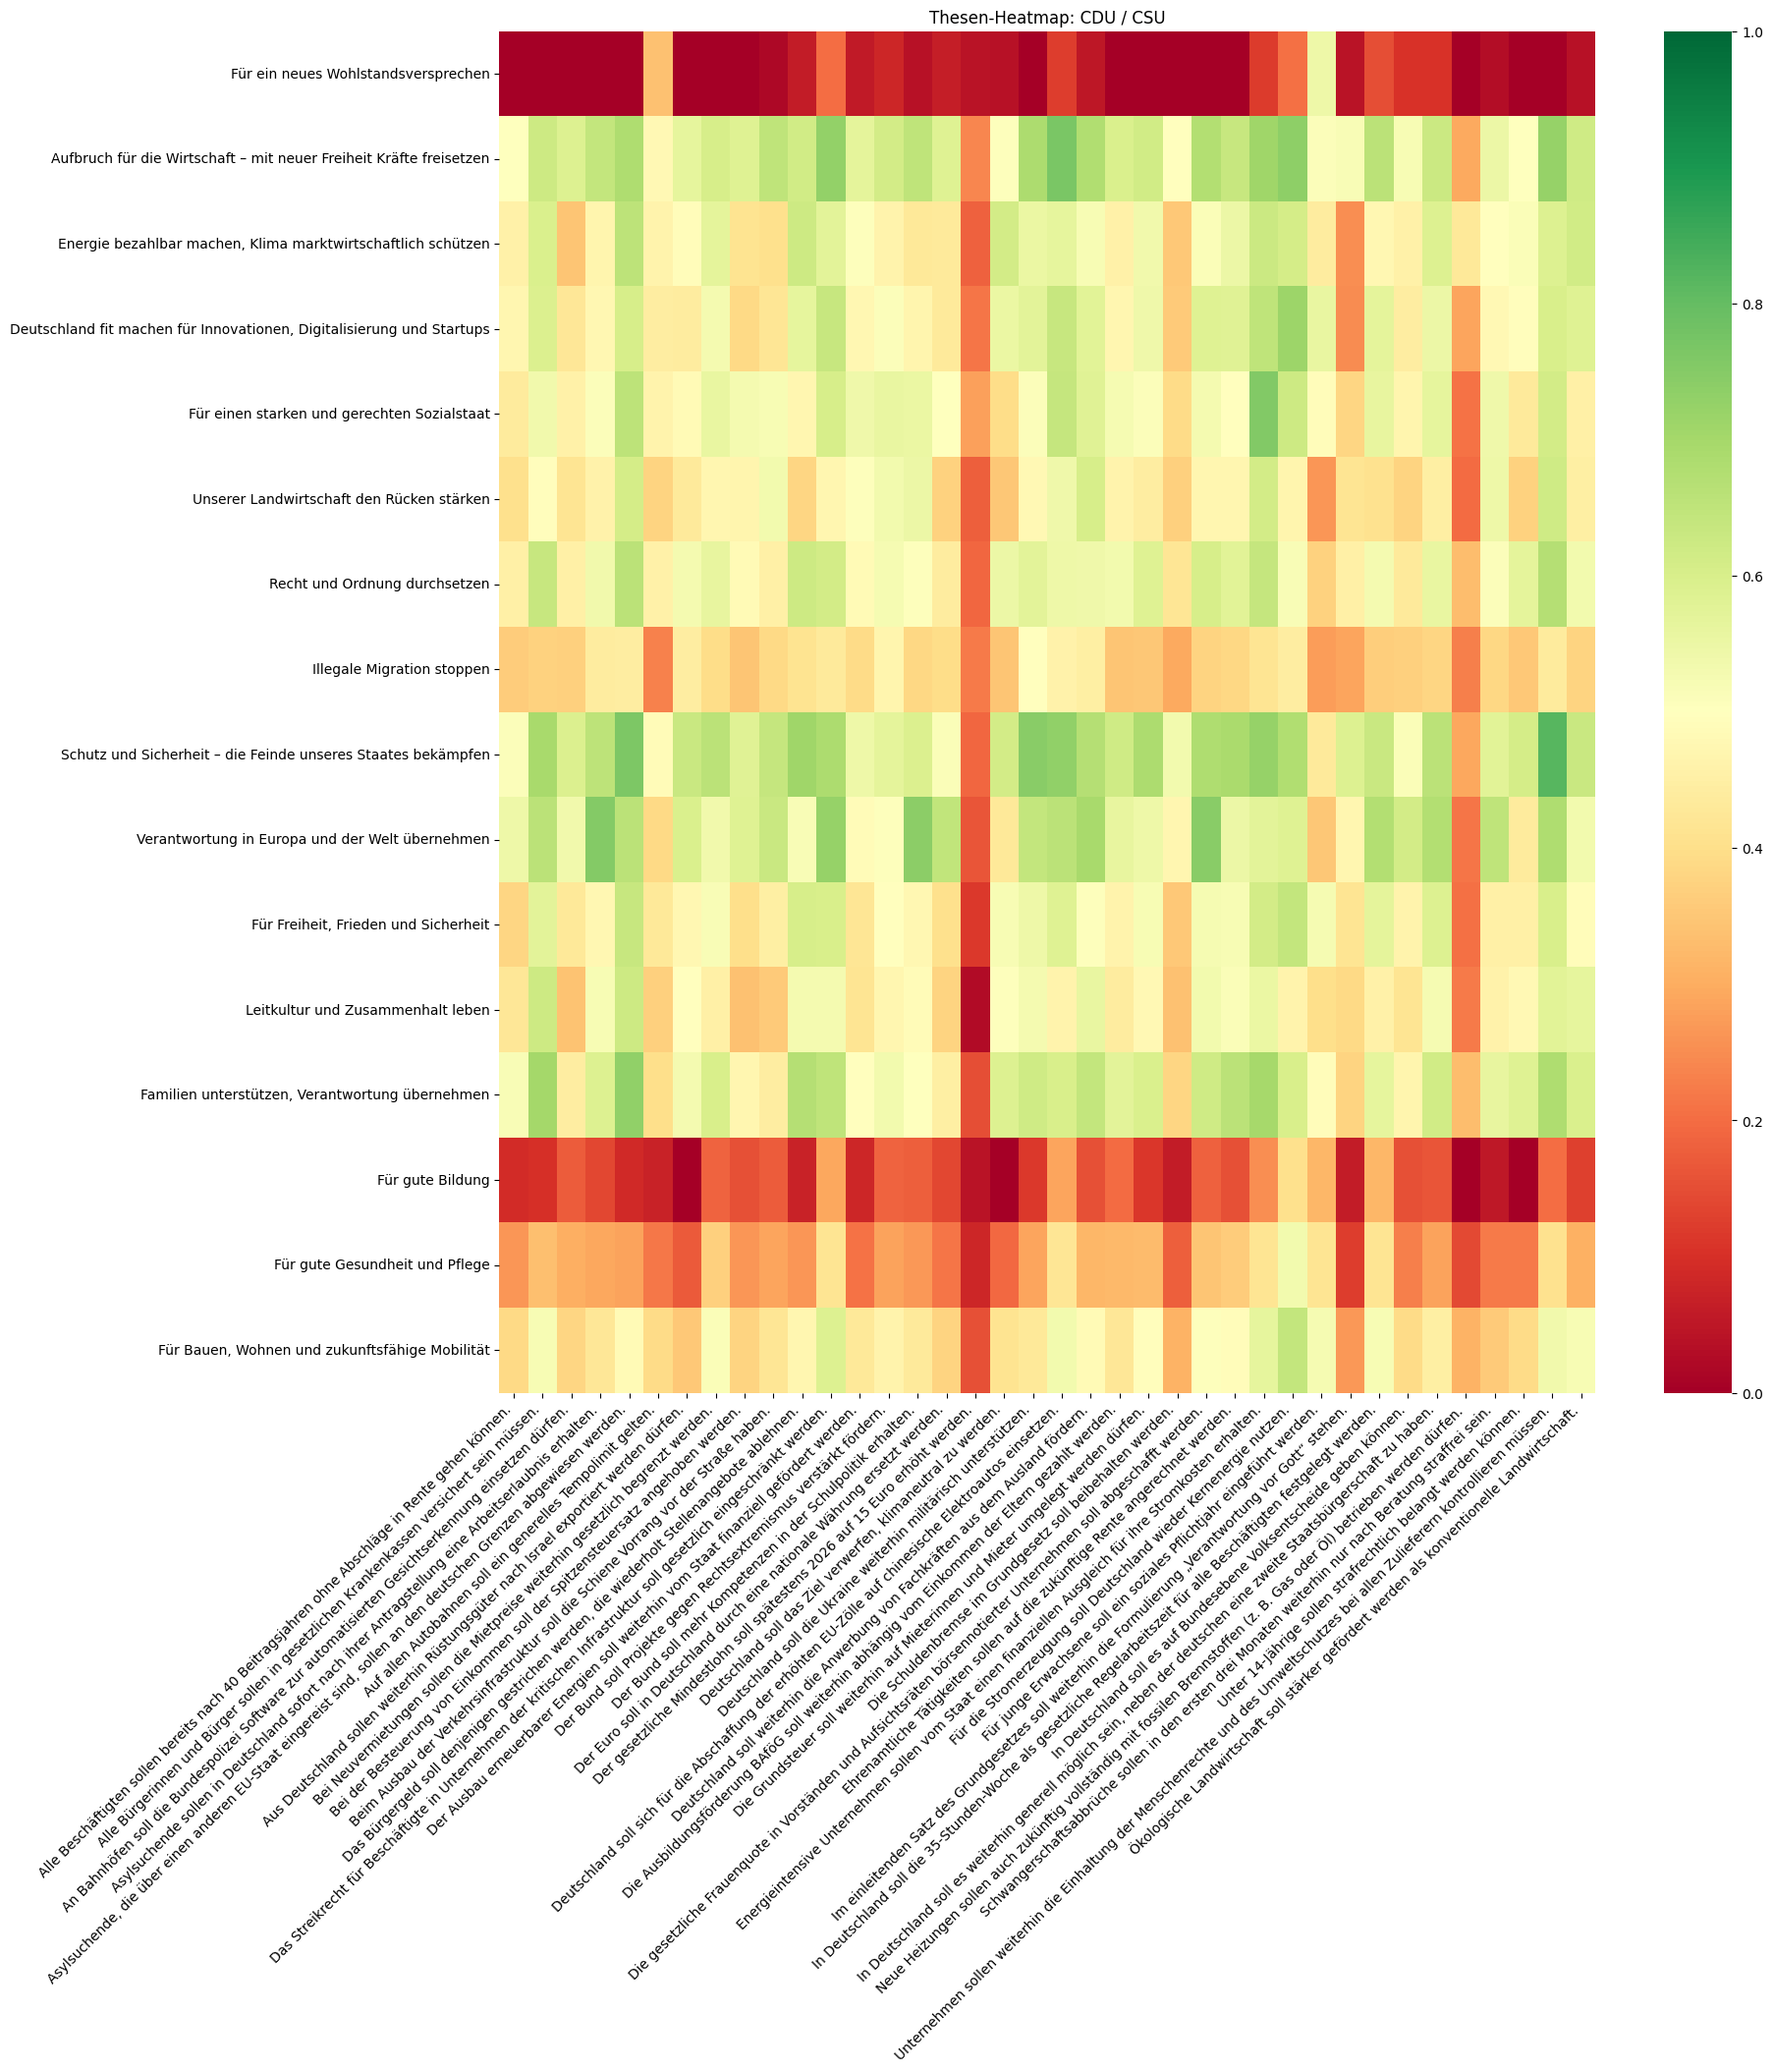

C:\Users\lnieb\AppData\Local\Temp\ipykernel_2656\1079315963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  party_df.dropna(inplace=True)


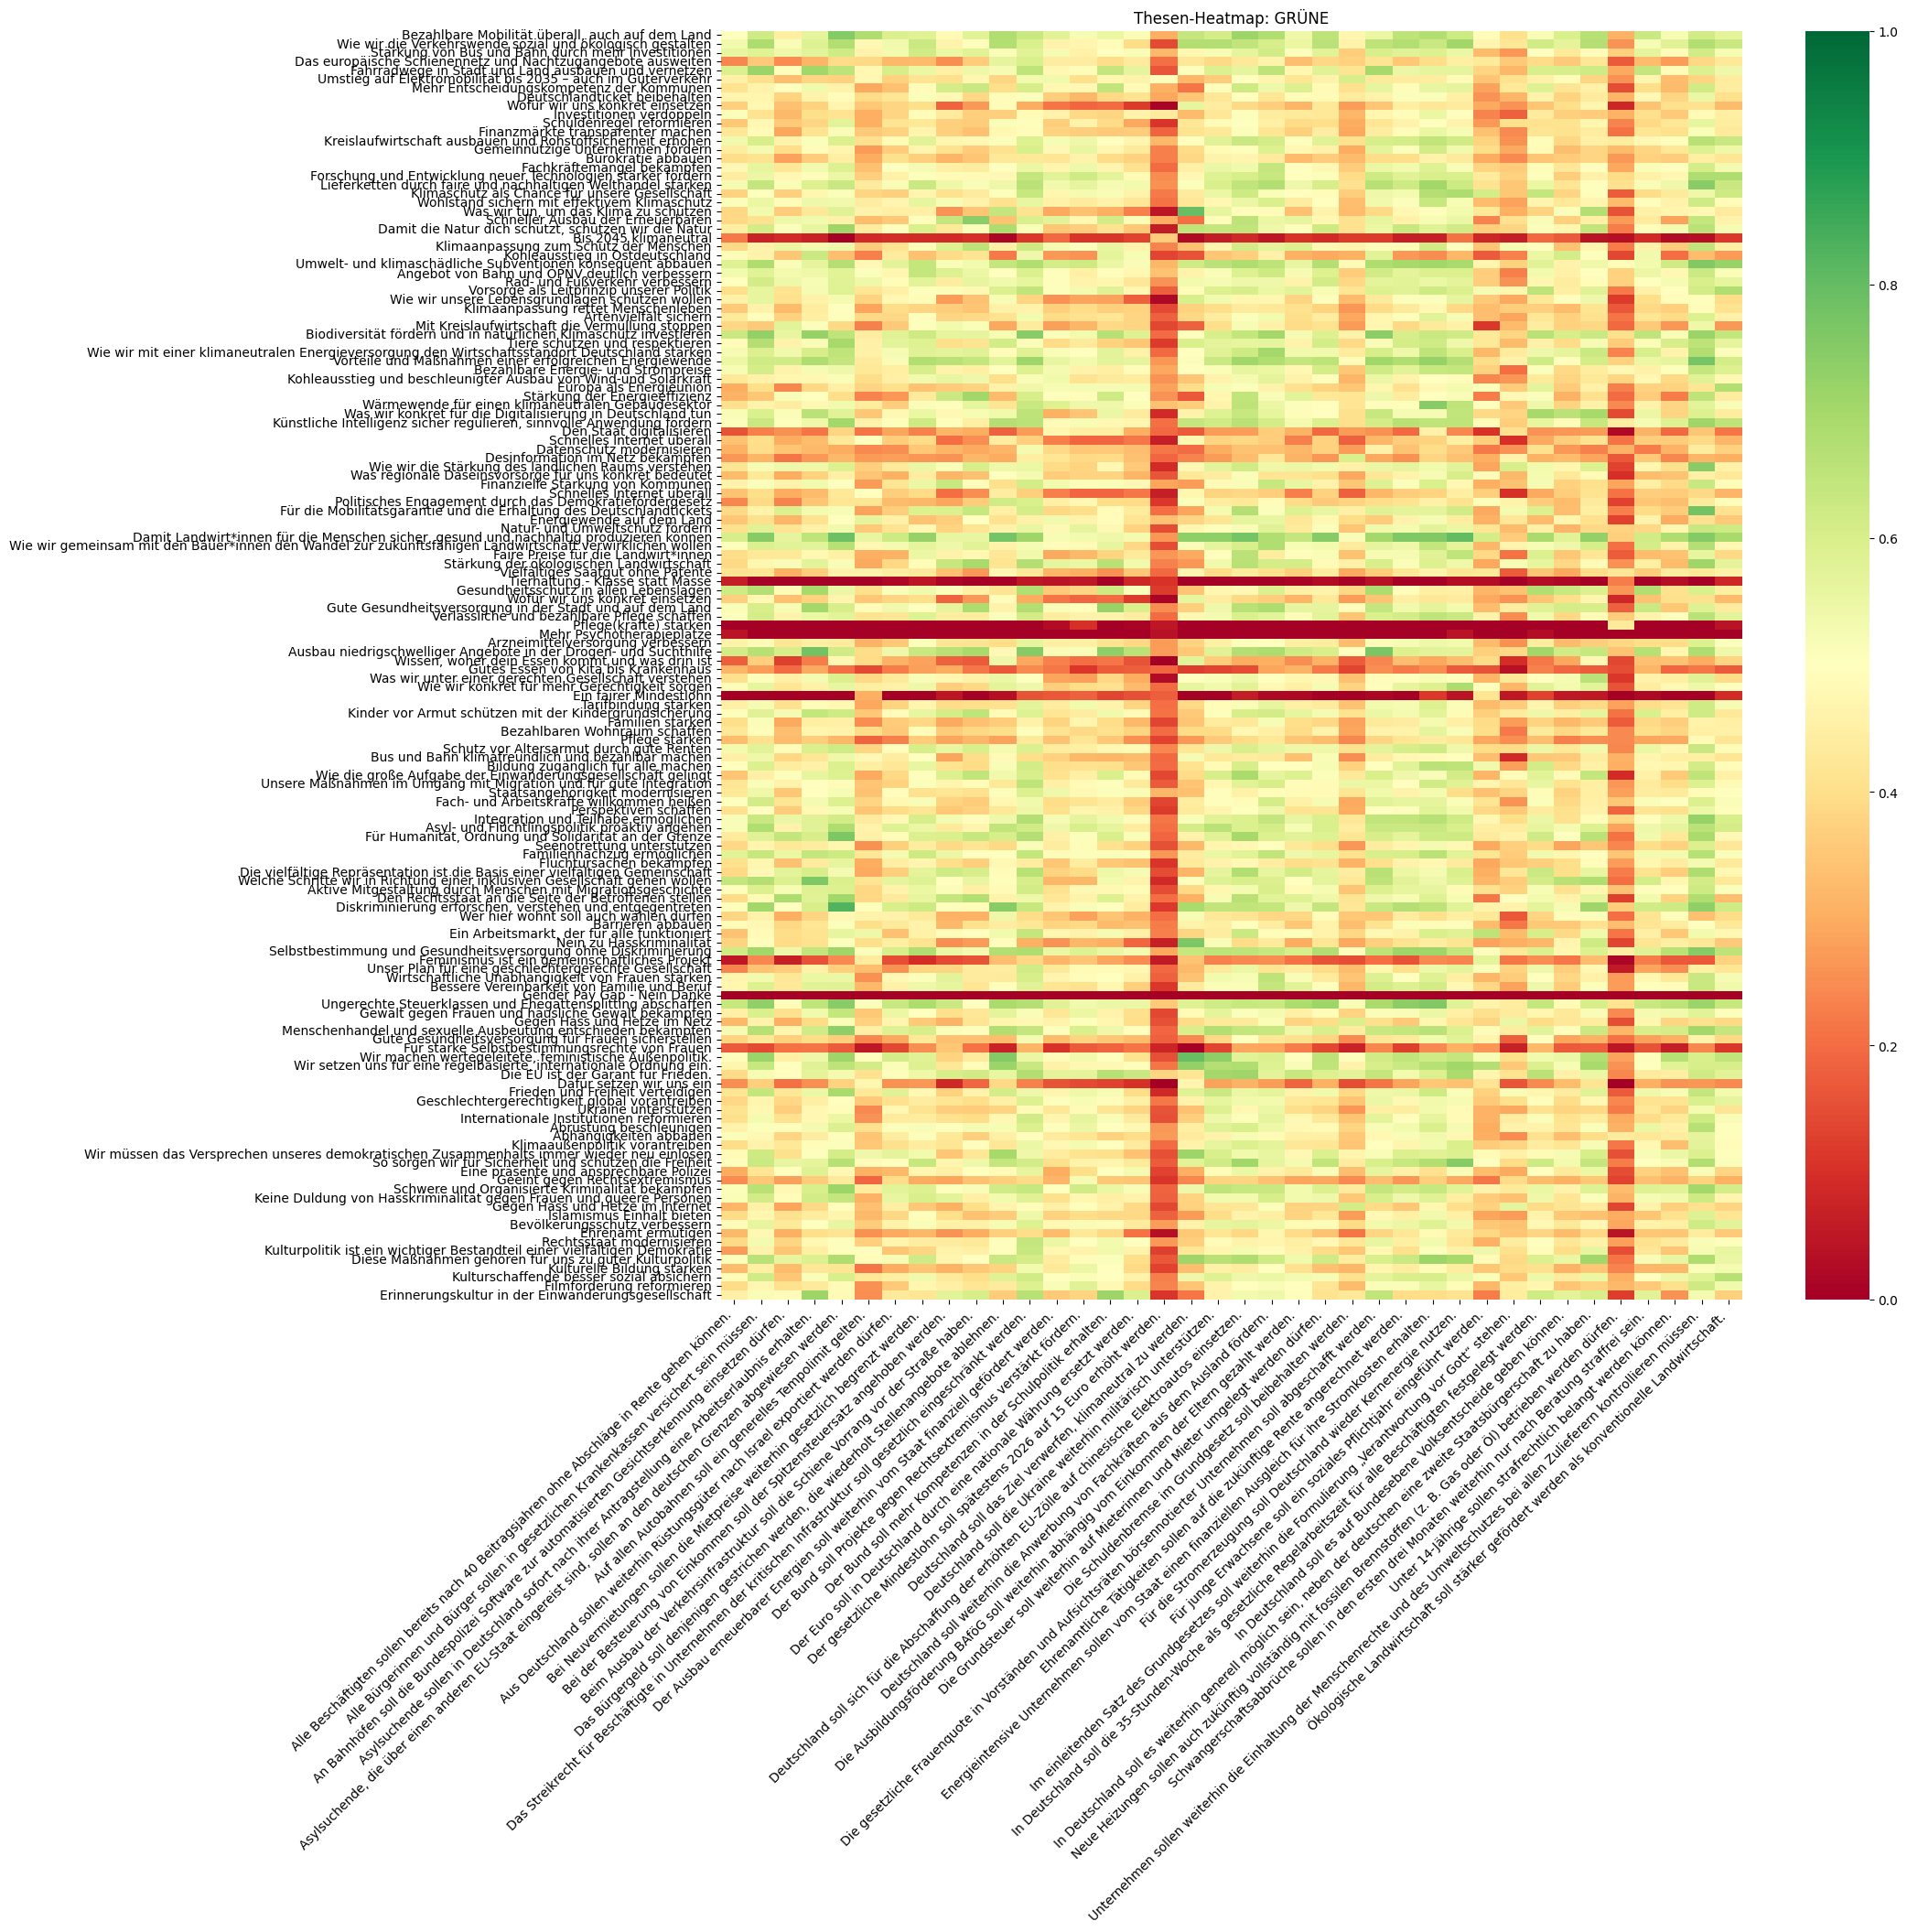

C:\Users\lnieb\AppData\Local\Temp\ipykernel_2656\1079315963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  party_df.dropna(inplace=True)
C:\Users\lnieb\AppData\Local\Temp\ipykernel_2656\1079315963.py:13: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity_score = party_these_doc.similarity(label_these_doc)


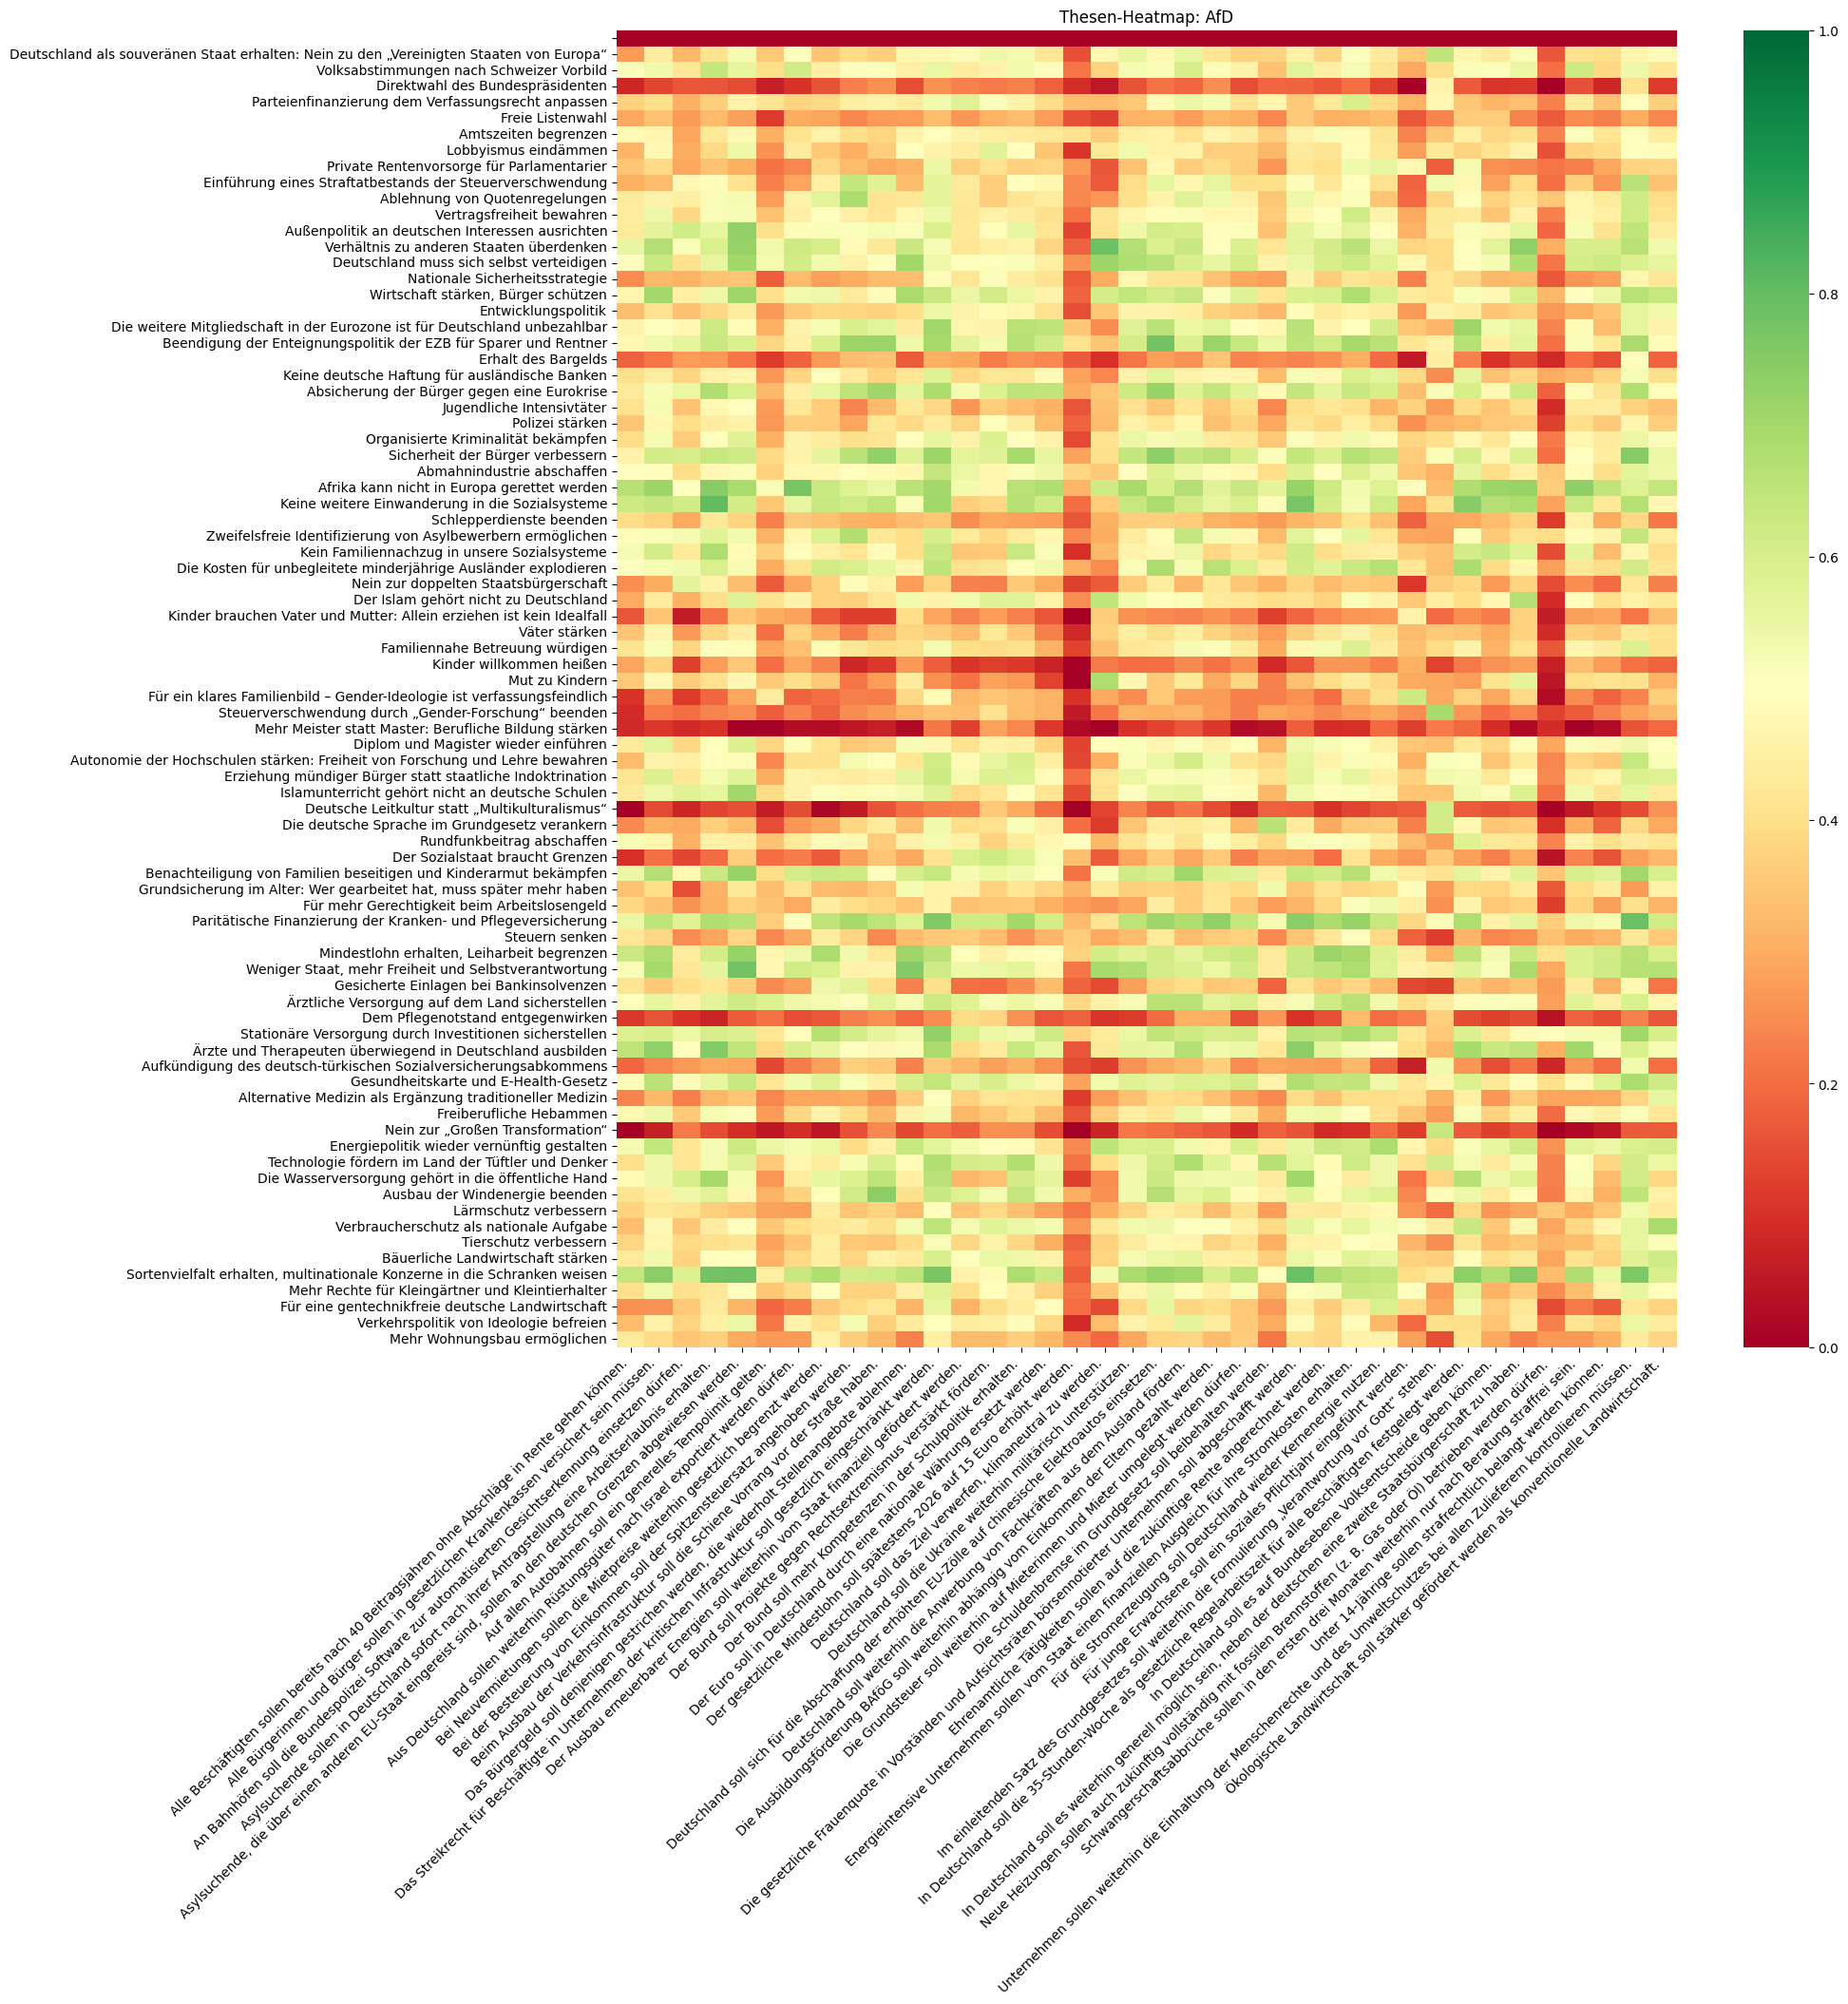

C:\Users\lnieb\AppData\Local\Temp\ipykernel_2656\1079315963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  party_df.dropna(inplace=True)


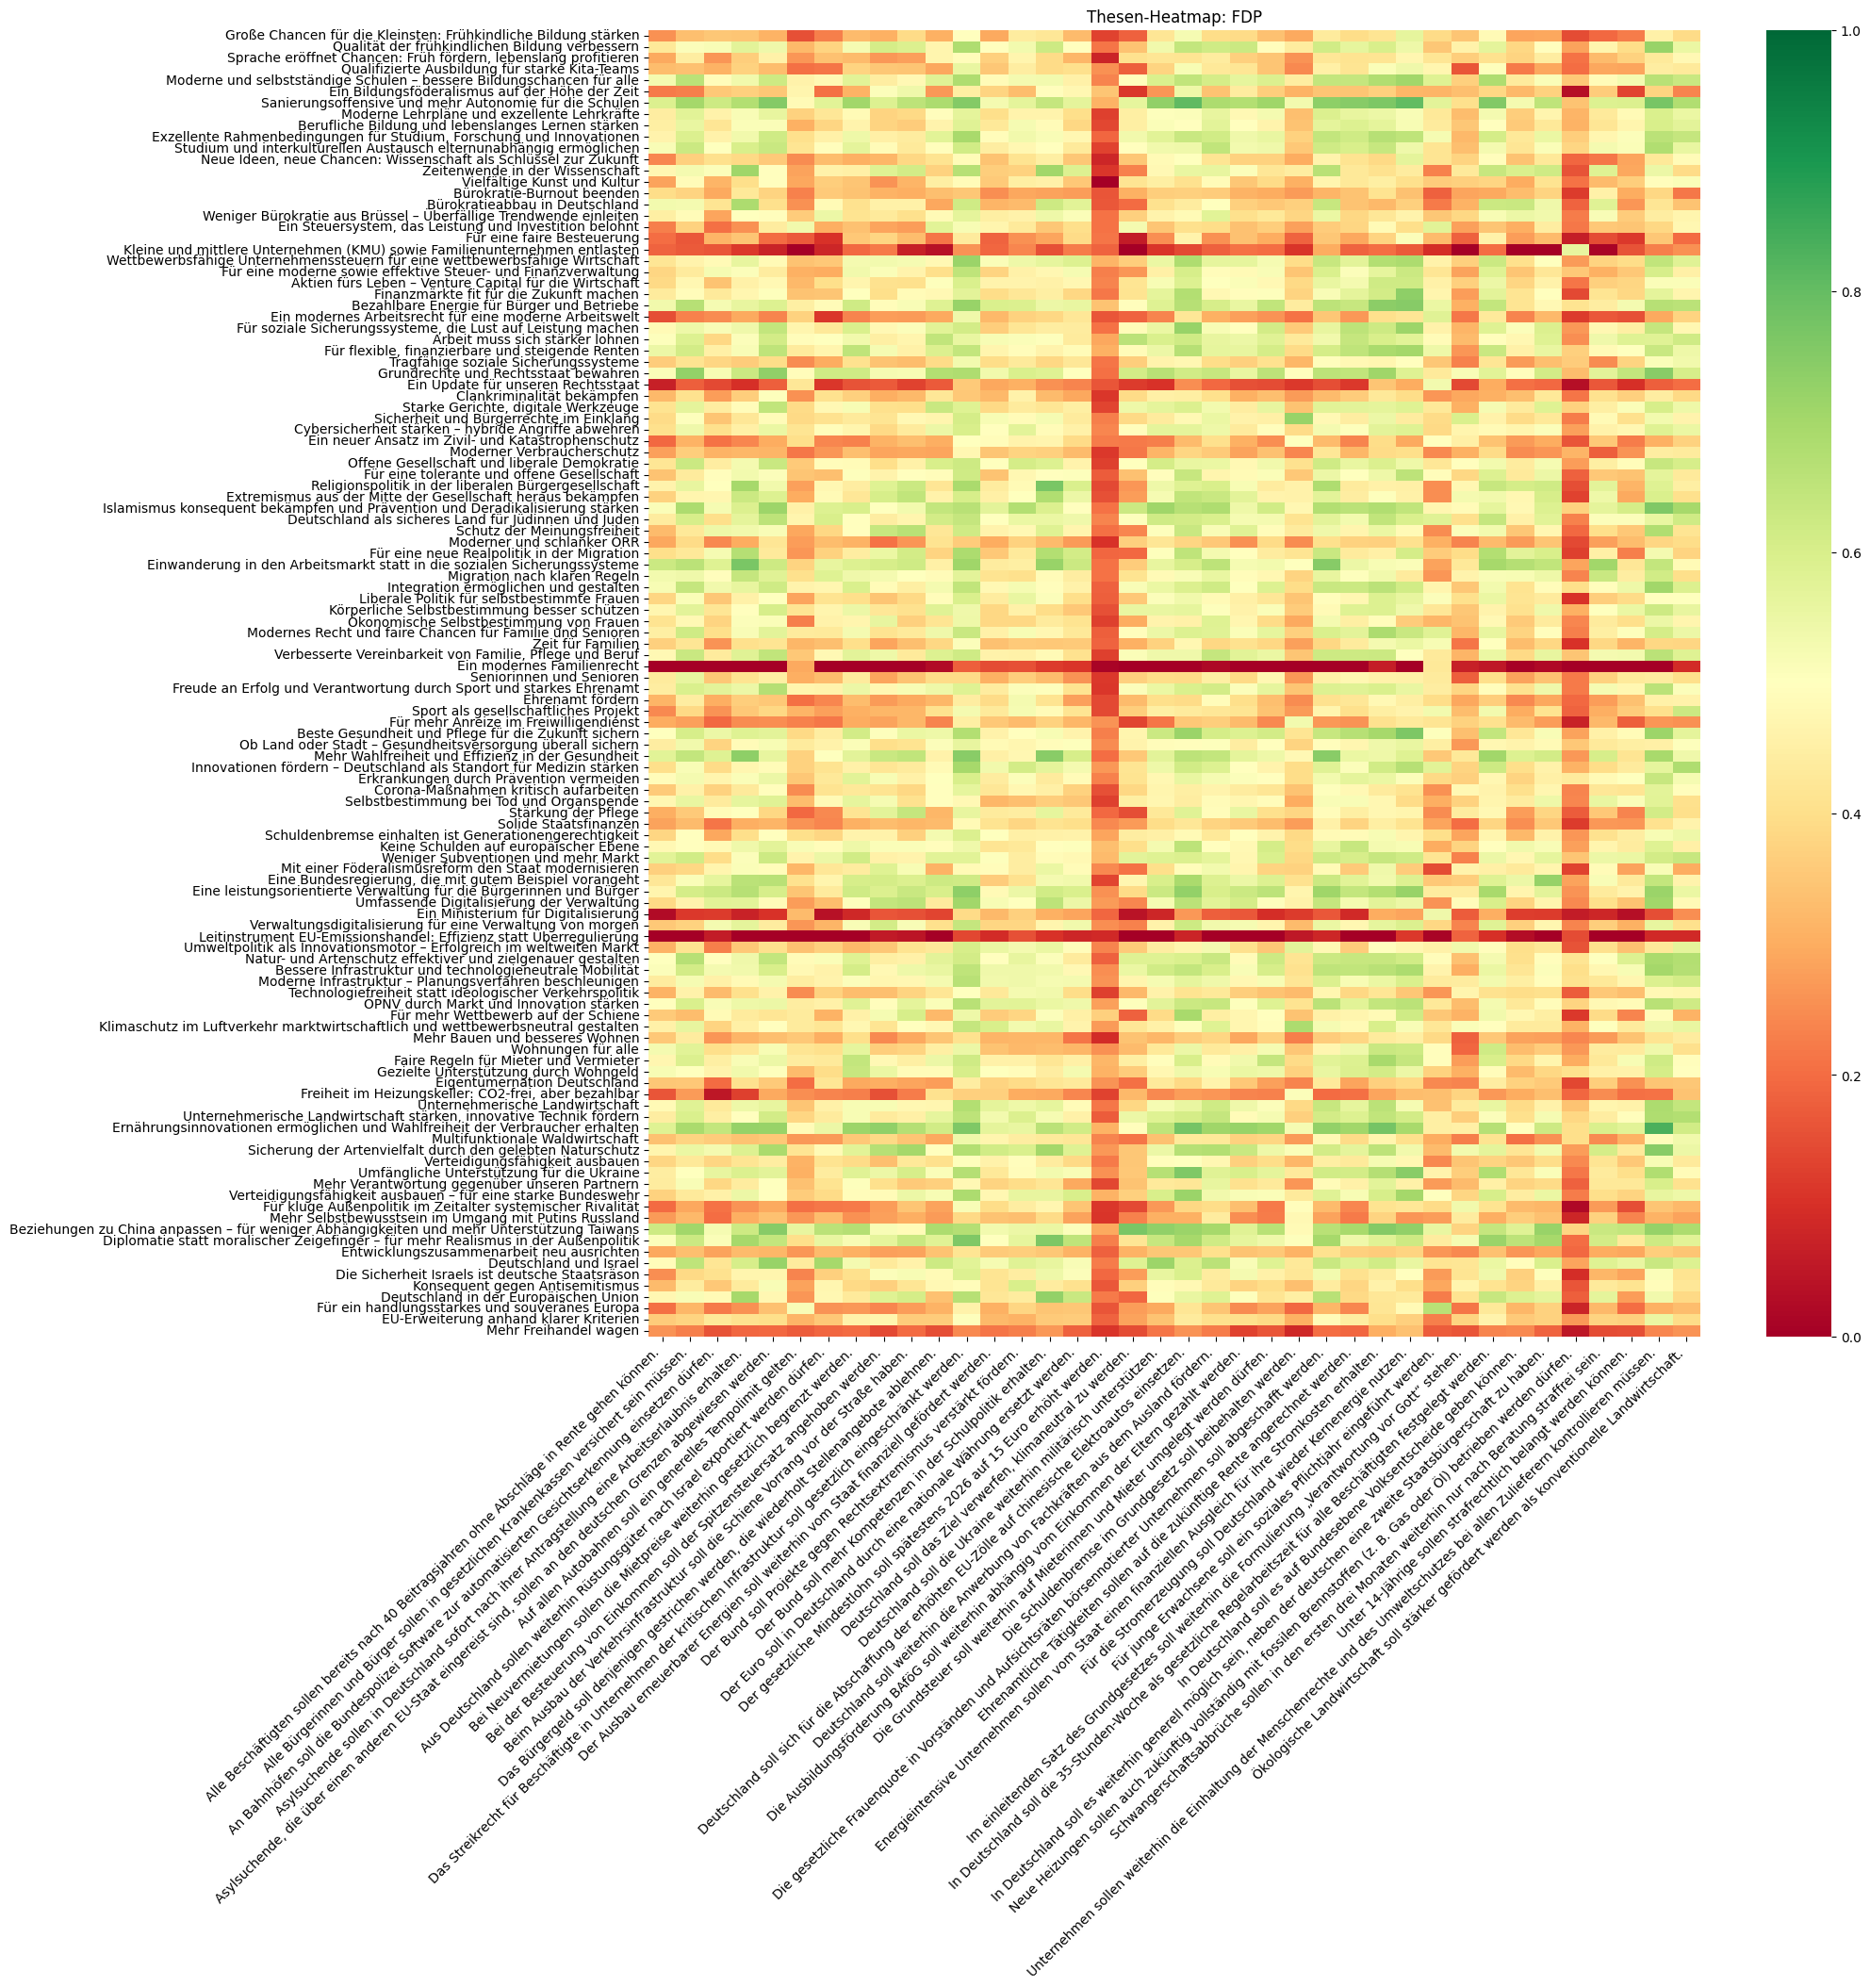

C:\Users\lnieb\AppData\Local\Temp\ipykernel_2656\1079315963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  party_df.dropna(inplace=True)


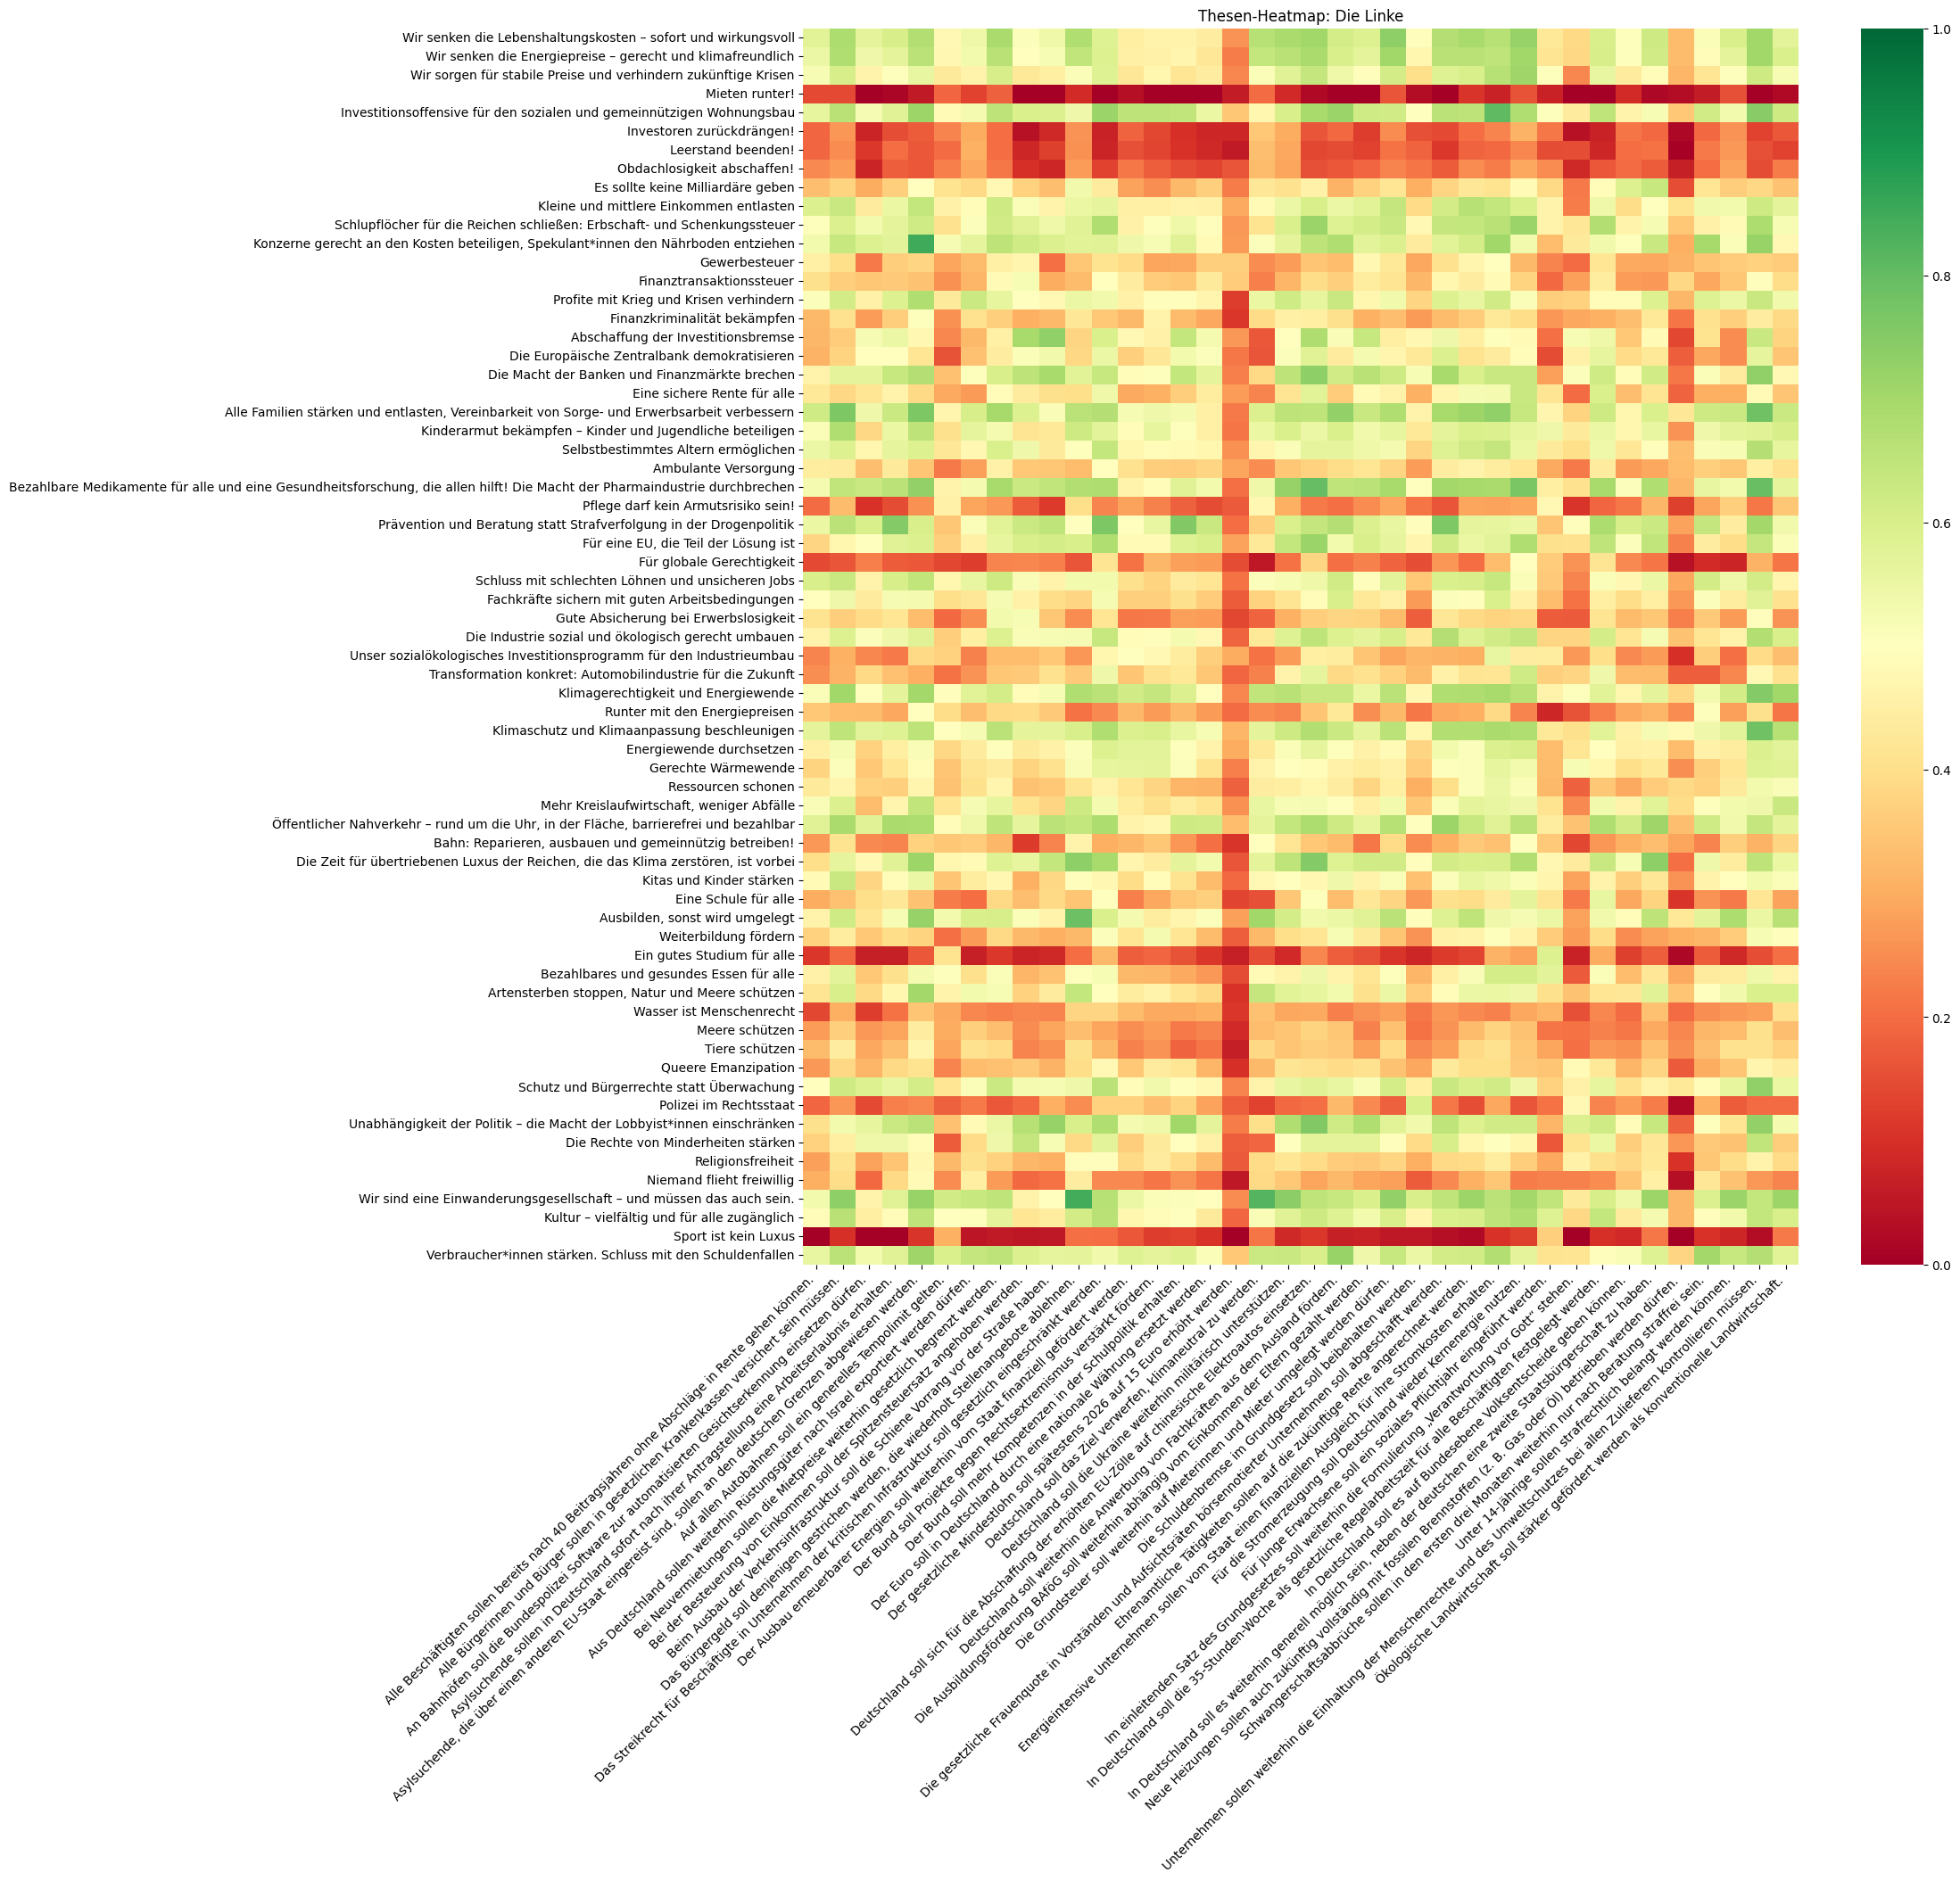

In [93]:

for party_str in parties_list:
    party_df = all_party_textes_df[all_party_textes_df['Party'] == party_str]
    party_df.dropna(inplace=True)
    party_these_list = party_df['These'].to_list()

    similarity_df = pd.DataFrame(columns=['party_these']+Labled_theses_list)

    for party_these in party_these_list:
        party_these_doc = nlp(party_these)
        row = [party_these]
        for label_these in Labled_theses_list:
            label_these_doc = nlp(label_these)
            similarity_score = party_these_doc.similarity(label_these_doc)
            row = row + [similarity_score]
        similarity_df.loc[len(similarity_df)] = row

    plt.figure(figsize=(18,18))
    sns.heatmap(similarity_df[Labled_theses_list], 
                cmap='RdYlGn', 
                annot= False,
                vmax= 1,
                vmin= 0,
                yticklabels=similarity_df["party_these"])
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Thesen-Heatmap: {party_str}")
    plt.show()

    predicted_theses_df[party_str] = similarity_df[Labled_theses_list].mean().tolist()


In [94]:
predicted_theses_df

# 0- 0.33       - trifft nicht zu 
# 0.33 - 0.66   - neutral 
# 0.66 - 1.00   - trifft zu

These  CDU / CSU     GRÜNE  \
0   Alle Beschäftigten sollen bereits nach 40 Beit...   0.383760  0.411345   
1   Alle Bürgerinnen und Bürger sollen in gesetzli...   0.502049  0.495558   
2   An Bahnhöfen soll die Bundespolizei Software z...   0.389396  0.404049   
3   Asylsuchende sollen in Deutschland sofort nach...   0.458695  0.471594   
4   Asylsuchende, die über einen anderen EU-Staat ...   0.532644  0.509184   
5   Auf allen Autobahnen soll ein generelles Tempo...   0.375236  0.364362   
6   Aus Deutschland sollen weiterhin Rüstungsgüter...   0.411350  0.413595   
7   Bei Neuvermietungen sollen die Mietpreise weit...   0.467581  0.468465   
8   Bei der Besteuerung von Einkommen soll der Spi...   0.397862  0.416265   
9   Beim Ausbau der Verkehrsinfrastruktur soll die...   0.423916  0.428057   
10  Das Bürgergeld soll denjenigen gestrichen werd...   0.473737  0.461953   
11  Das Streikrecht für Beschäftigte in Unternehme...   0.545930  0.526626   
12  Der Ausbau erneuerbarer Energien soll weiterhi...   0.412859  0.412179   
13  Der Bund soll Projekte gegen Rechtsextremismus...   0.453719  0.427958   
14  Der Bund soll mehr Kompetenzen in der Schulpol...   0.453088  0.442914   
15  Der Euro soll in Deutschland durch eine nation...   0.396015  0.397803   
16  Der gesetzliche Mindestlohn soll spätestens 20...   0.153782  0.186755   
17  Deutschland soll das Ziel verwerfen, klimaneut...   0.411278  0.410319   
18  Deutschland soll die Ukraine weiterhin militär...   0.483037  0.477598   
19  Deutschland soll sich für die Abschaffung der ...   0.534314  0.512174   
20  Deutschland soll weiterhin die Anwerbung von F...   0.500933  0.503077   
21  Die Ausbildungsförderung BAföG soll weiterhin ...   0.435823  0.440576   
22  Die Grundsteuer soll weiterhin auf Mieterinnen...   0.457050  0.460948   
23  Die Schuldenbremse im Grundgesetz soll beibeha...   0.332581  0.353109   
24  Die gesetzliche Frauenquote in Vorständen und ...   0.490706  0.494088   
25  Ehrenamtliche Tätigkeiten sollen auf die zukün...   0.473592  0.479477   
26  Energieintensive Unternehmen sollen vom Staat ...   0.557250  0.521629   
27  Für die Stromerzeugung soll Deutschland wieder...   0.554141  0.501253   
28  Für junge Erwachsene soll ein soziales Pflicht...   0.431763  0.362207   
29  Im einleitenden Satz des Grundgesetzes soll we...   0.330216  0.332560   
30  In Deutschland soll die 35-Stunden-Woche als g...   0.491482  0.468658   
31  In Deutschland soll es auf Bundesebene Volksen...   0.400944  0.401387   
32  In Deutschland soll es weiterhin generell mögl...   0.485484  0.465225   
33  Neue Heizungen sollen auch zukünftig vollständ...   0.224636  0.239490   
34  Schwangerschaftsabbrüche sollen in den ersten ...   0.428827  0.431506   
35  Unter 14-Jährige sollen strafrechtlich belangt...   0.394108  0.404499   
36  Unternehmen sollen weiterhin die Einhaltung de...   0.543828  0.536873   
37  Ökologische Landwirtschaft soll stärker geförd...   0.464005  0.460880   

         SPD       AfD  Die Linke       FDP  
0   0.588358  0.376622   0.396876  0.387590  
1   0.732697  0.455525   0.483452  0.472788  
2   0.551074  0.371030   0.377724  0.394675  
3   0.627890  0.453130   0.436151  0.464762  
4   0.687216  0.470605   0.500670  0.480617  
5   0.538560  0.301598   0.360439  0.343114  
6   0.632510  0.391842   0.407564  0.386917  
7   0.651251  0.422645   0.471340  0.448303  
8   0.481508  0.415940   0.407419  0.424328  
9   0.533175  0.412656   0.404132  0.431598  
10  0.682625  0.426586   0.466964  0.441593  
11  0.598007  0.512435   0.495834  0.562916  
12  0.509867  0.408327   0.398477  0.421745  
13  0.524448  0.429515   0.405157  0.454743  
14  0.538417  0.455657   0.415645  0.479201  
15  0.462345  0.404941   0.381765  0.435056  
16  0.238441  0.201769   0.200318  0.200363  
17  0.734624  0.341365   0.405971  0.358660  
18  0.729978  0.446557   0.467339  0.466044  
19  0.644105  0.479771   0.498709  0.524792  
20  0.661871  0.473212   0.464169  0.49

In [95]:
Labled_theses_df

These        CDU / CSU  \
0   Alle Beschäftigten sollen bereits nach 40 Beit...  stimme nicht zu   
1   Alle Bürgerinnen und Bürger sollen in gesetzli...  stimme nicht zu   
2   An Bahnhöfen soll die Bundespolizei Software z...        stimme zu   
3   Asylsuchende sollen in Deutschland sofort nach...  stimme nicht zu   
4   Asylsuchende, die über einen anderen EU-Staat ...        stimme zu   
5   Auf allen Autobahnen soll ein generelles Tempo...  stimme nicht zu   
6   Aus Deutschland sollen weiterhin Rüstungsgüter...        stimme zu   
7   Bei Neuvermietungen sollen die Mietpreise weit...        stimme zu   
8   Bei der Besteuerung von Einkommen soll der Spi...  stimme nicht zu   
9   Beim Ausbau der Verkehrsinfrastruktur soll die...  stimme nicht zu   
10  Das Bürgergeld soll denjenigen gestrichen werd...        stimme zu   
11  Das Streikrecht für Beschäftigte in Unternehme...          neutral   
12  Der Ausbau erneuerbarer Energien soll weiterhi...        stimme zu   
13  Der Bund soll Projekte gegen Rechtsextremismus...        stimme zu   
14  Der Bund soll mehr Kompetenzen in der Schulpol...  stimme nicht zu   
15  Der Euro soll in Deutschland durch eine nation...  stimme nicht zu   
16  Der gesetzliche Mindestlohn soll spätestens 20...          neutral   
17  Deutschland soll das Ziel verwerfen, klimaneut...  stimme nicht zu   
18  Deutschland soll die Ukraine weiterhin militär...        stimme zu   
19  Deutschland soll sich für die Abschaffung der ...          neutral   
20  Deutschland soll weiterhin die Anwerbung von F...        stimme zu   
21  Die Ausbildungsförderung BAföG soll weiterhin ...        stimme zu   
22  Die Grundsteuer soll weiterhin auf Mieterinnen...        stimme zu   
23  Die Schuldenbremse im Grundgesetz soll beibeha...        stimme zu   
24  Die gesetzliche Frauenquote in Vorständen und ...  stimme nicht zu   
25  Ehrenamtliche Tätigkeiten sollen auf die zukün...  stimme nicht zu   
26  Energieintensive Unternehmen sollen vom Staat ...        stimme zu   
27  Für die Stromerzeugung soll Deutschland wieder...        stimme zu   
28  Für junge Erwachsene soll ein soziales Pflicht...        stimme zu   
29  Im einleitenden Satz des Grundgesetzes soll we...        stimme zu   
30  In Deutschland soll die 35-Stunden-Woche als g...  stimme nicht zu   
31  In Deutschland soll es auf Bundesebene Volksen...  stimme nicht zu   
32  In Deutschland soll es weiterhin generell mögl...  stimme nicht zu   
33  Neue Heizungen sollen auch zukünftig vollständ...        stimme zu   
34  Schwangerschaftsabbrüche sollen in den ersten ...        stimme zu   
35  Unter 14-Jährige sollen strafrechtlich belangt...        stimme zu   
36  Unternehmen sollen weiterhin die Einhaltung de...  stimme nicht zu   
37  Ökologische Landwirtschaft soll stärker geförd...  stimme nicht zu   

              GRÜNE              SPD              AfD        Die Linke  \
0   stimme nicht zu  stimme nicht zu  stimme nicht zu        stimme zu   
1         stimme zu        stimme zu  stimme nicht zu        stimme zu   
2   stimme nicht zu  stimme nicht zu        stimme zu  stimme nicht zu   
3         stimme zu        stimme zu  stimme nicht zu        stimme zu   
4   stimme nicht zu  stimme nicht zu        stimme zu  stimme nicht zu   
5         stimme zu        stimme zu  stimme nicht zu        stimme zu   
6         stimme zu        stimme zu          neutral  stimme nicht zu   
7         stimme zu        stimme zu  stimme nicht zu        stimme zu   
8         stimme zu        stimme zu  stimme nicht zu        stimme zu   
9         stimme zu        stimme zu  stimme nicht zu        stimme zu   
10  stimme nicht zu        stimme zu        stimme zu  stimme nicht zu   
11  stimme nicht zu  stimme nicht zu        stimme zu  stimme nicht zu   
12        stimme zu        stimme zu  stimme nicht zu        stimme zu   
13        stimme zu        stimme zu  stimme nicht zu        stimme zu   
14        stimme zu        stimme zu  stimme nicht 

C:\Users\lnieb\AppData\Local\Temp\ipykernel_2656\865680615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  party_df.dropna(inplace=True)


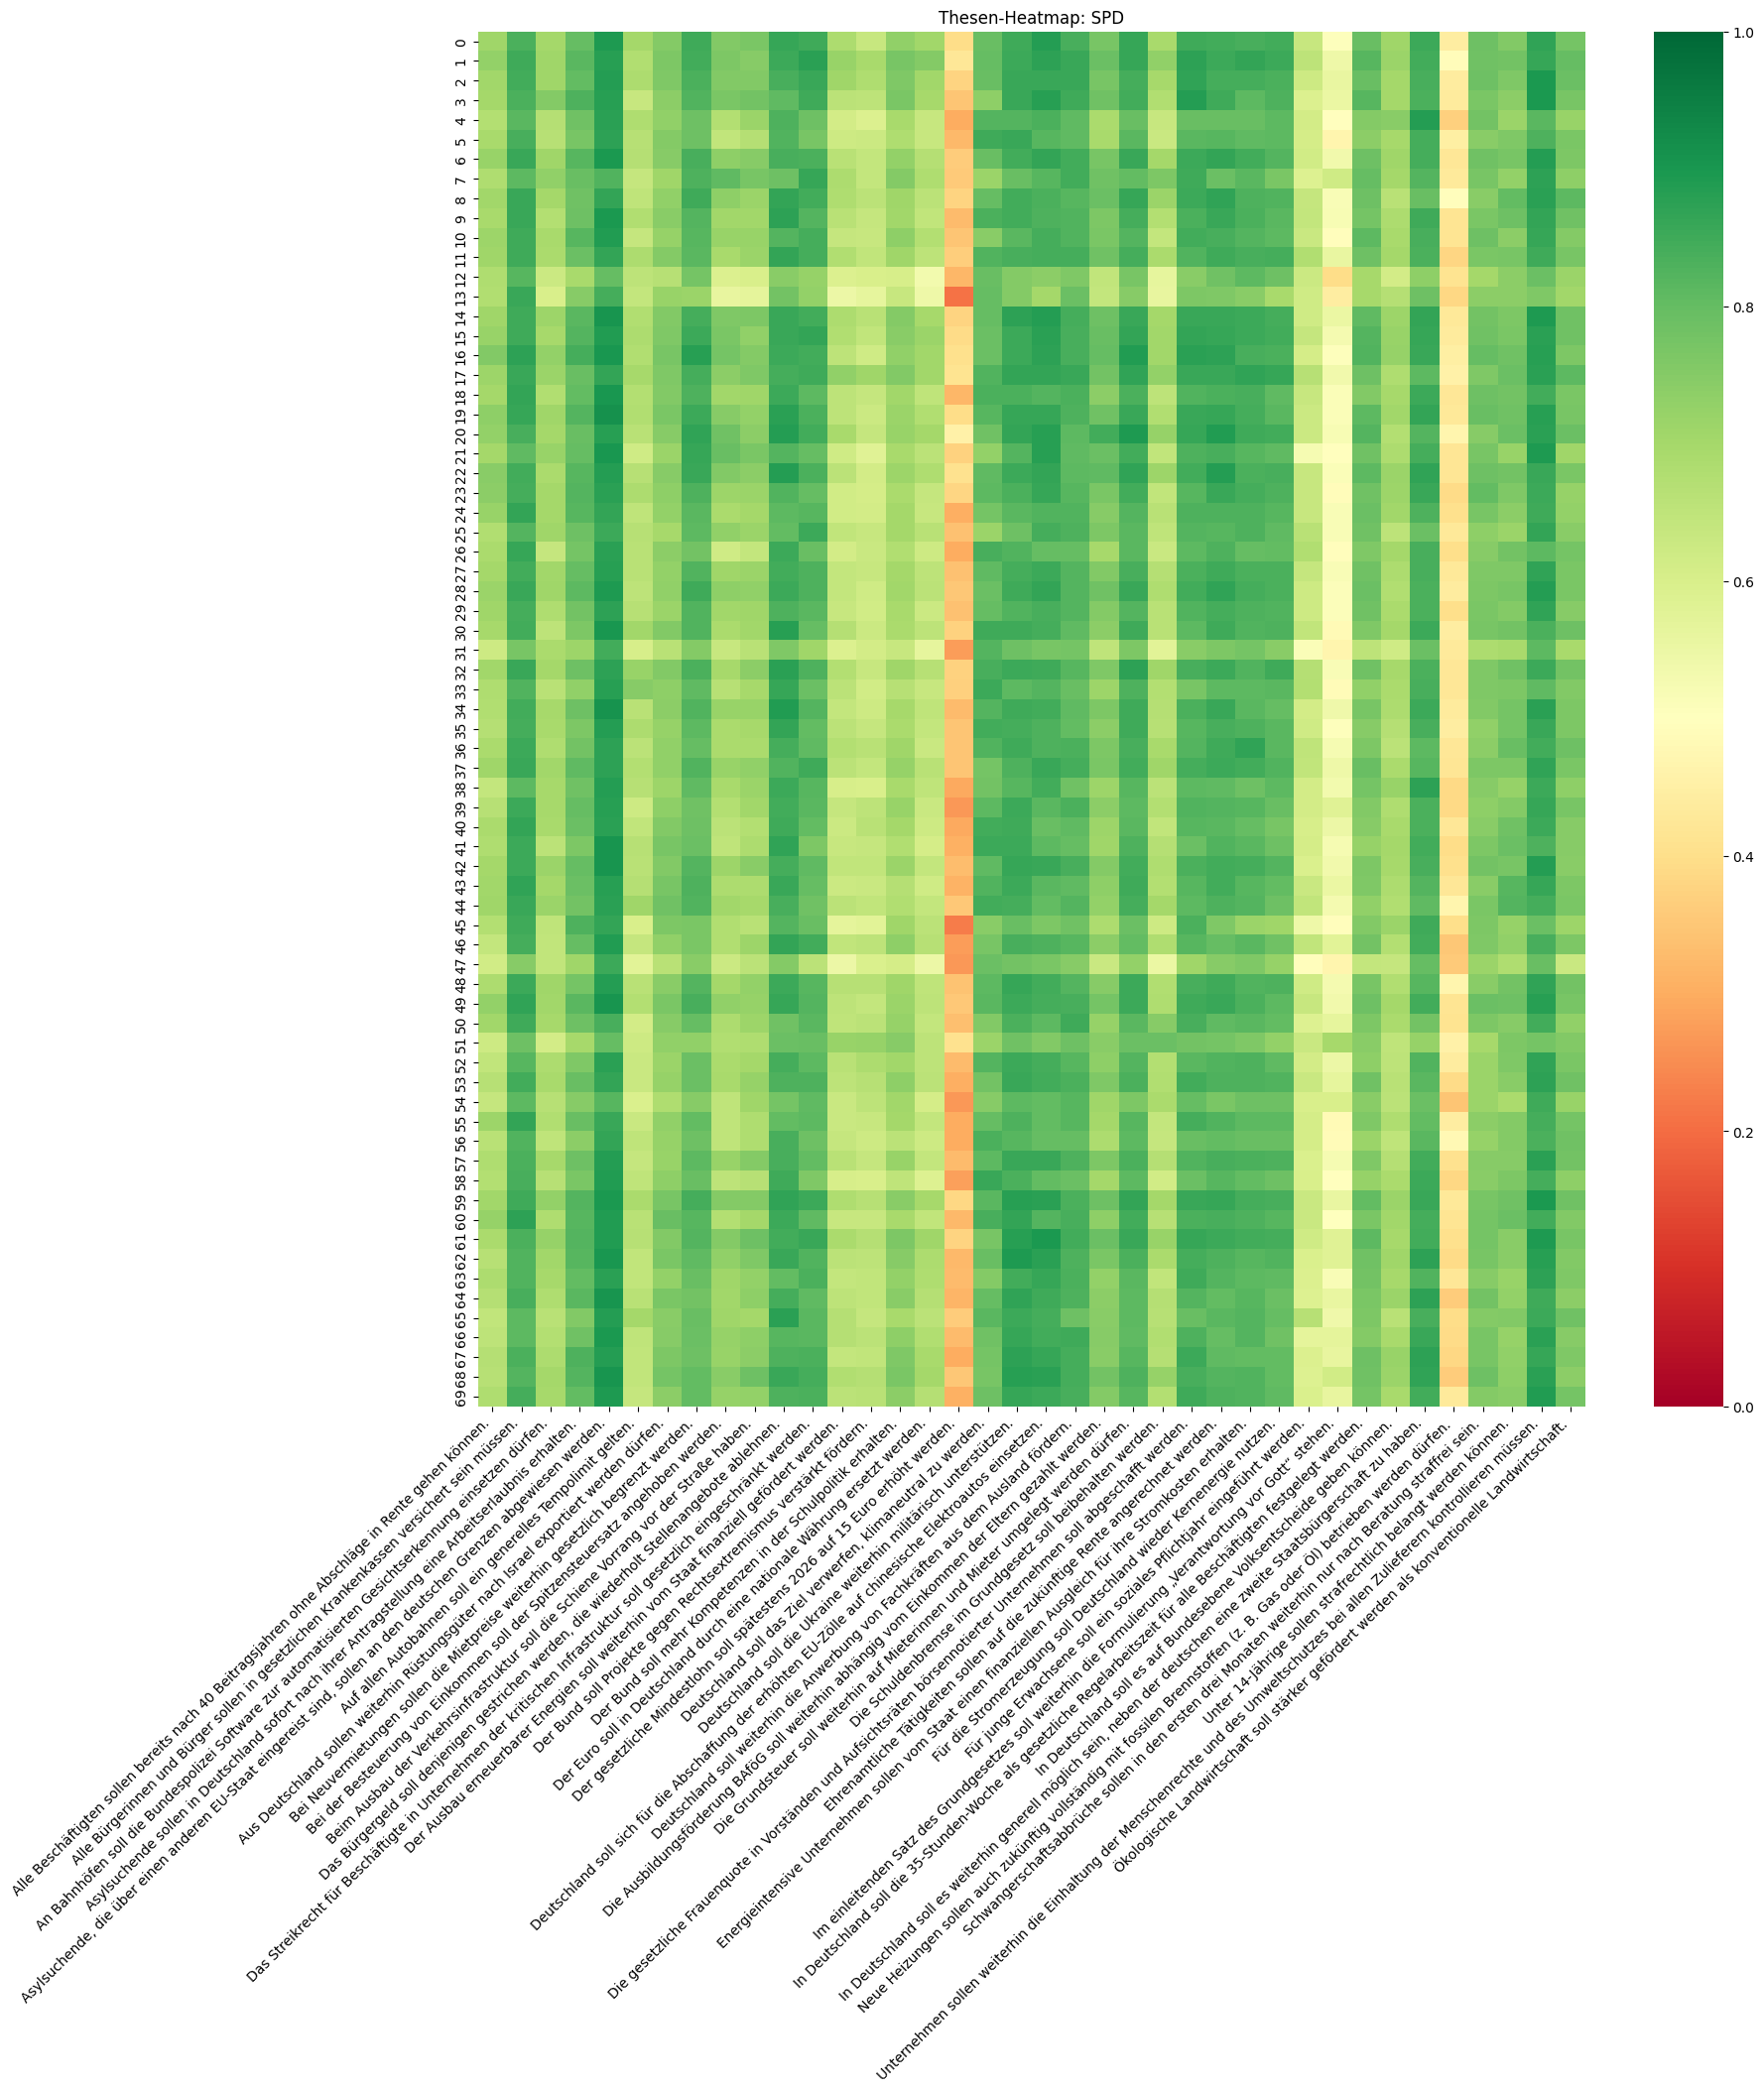

C:\Users\lnieb\AppData\Local\Temp\ipykernel_2656\865680615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  party_df.dropna(inplace=True)


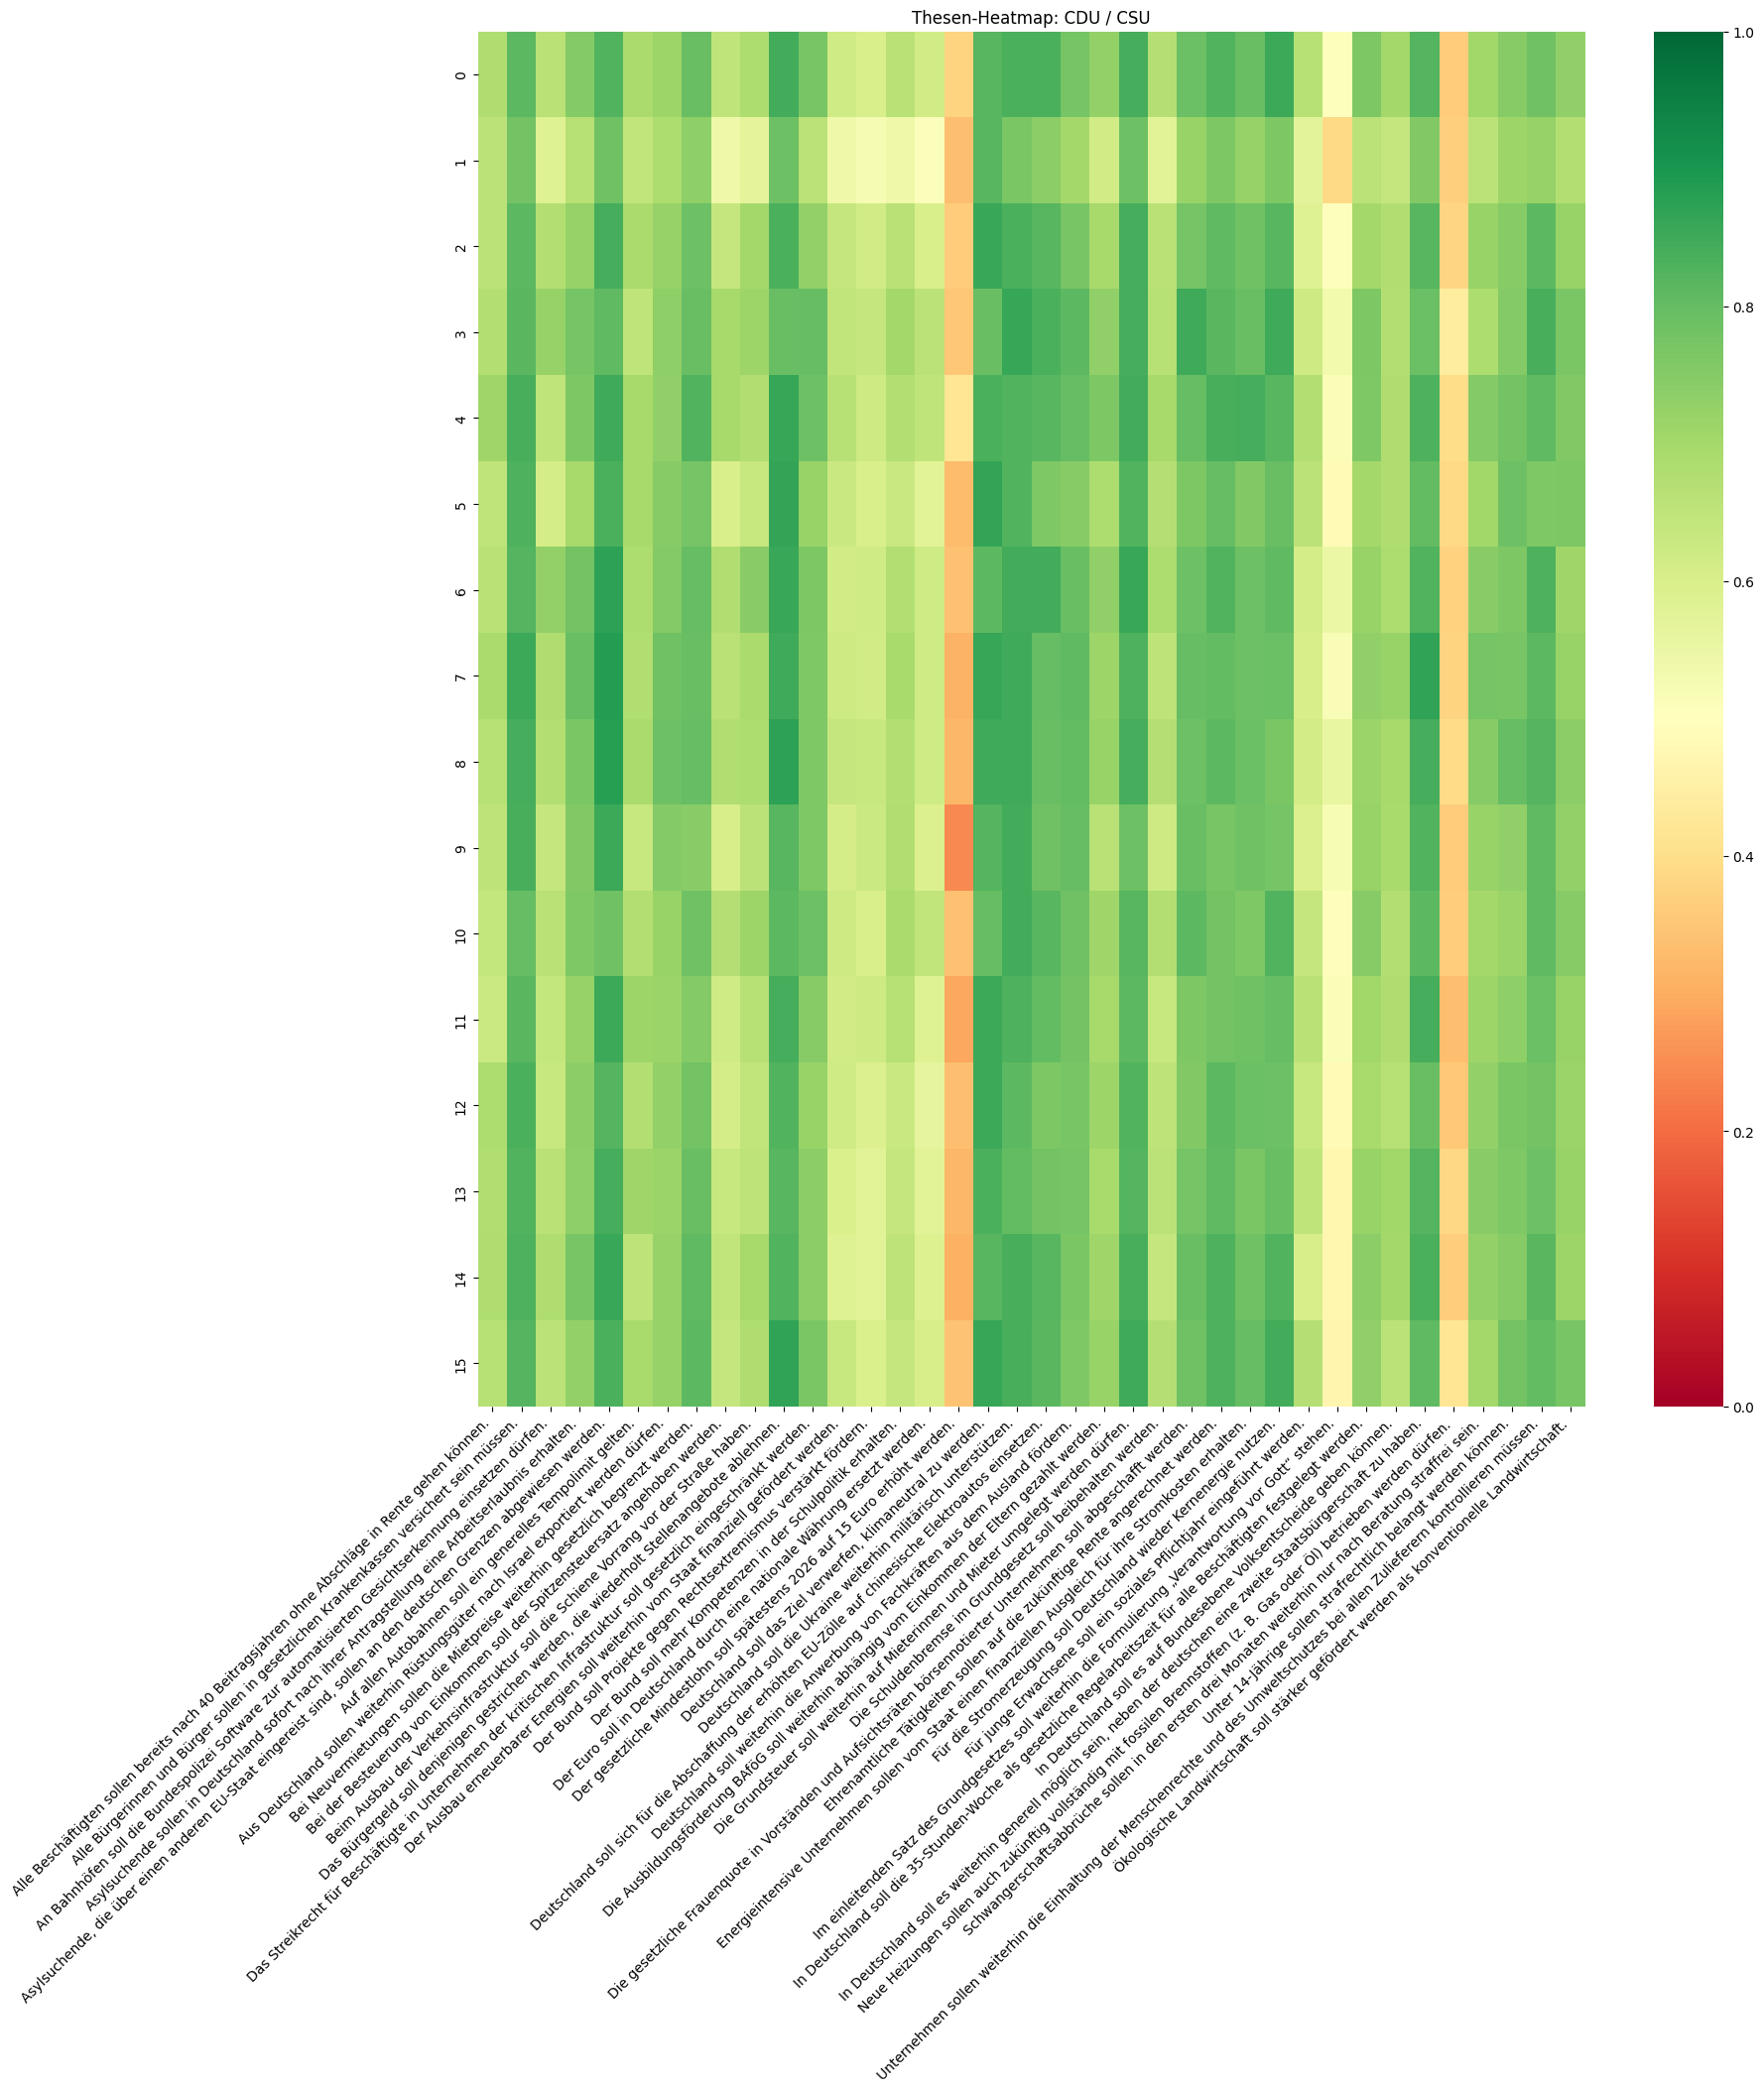

C:\Users\lnieb\AppData\Local\Temp\ipykernel_2656\865680615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  party_df.dropna(inplace=True)
C:\Users\lnieb\AppData\Local\Temp\ipykernel_2656\865680615.py:13: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity_score = party_these_doc.similarity(label_these_doc)
C:\Users\lnieb\AppData\Local\Temp\ipykernel_2656\865680615.py:13: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity_score = party_these_doc.similarity(label_these_doc)
C:\Users\lnieb\AppData\Local\Temp\ipykernel_2656\865680615.py:13: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity_score = party_these_doc.similarity(label_these_doc)
C:\Users\lnieb\AppData\Local\Temp\ipykernel_2656\865680615.py:13: Use

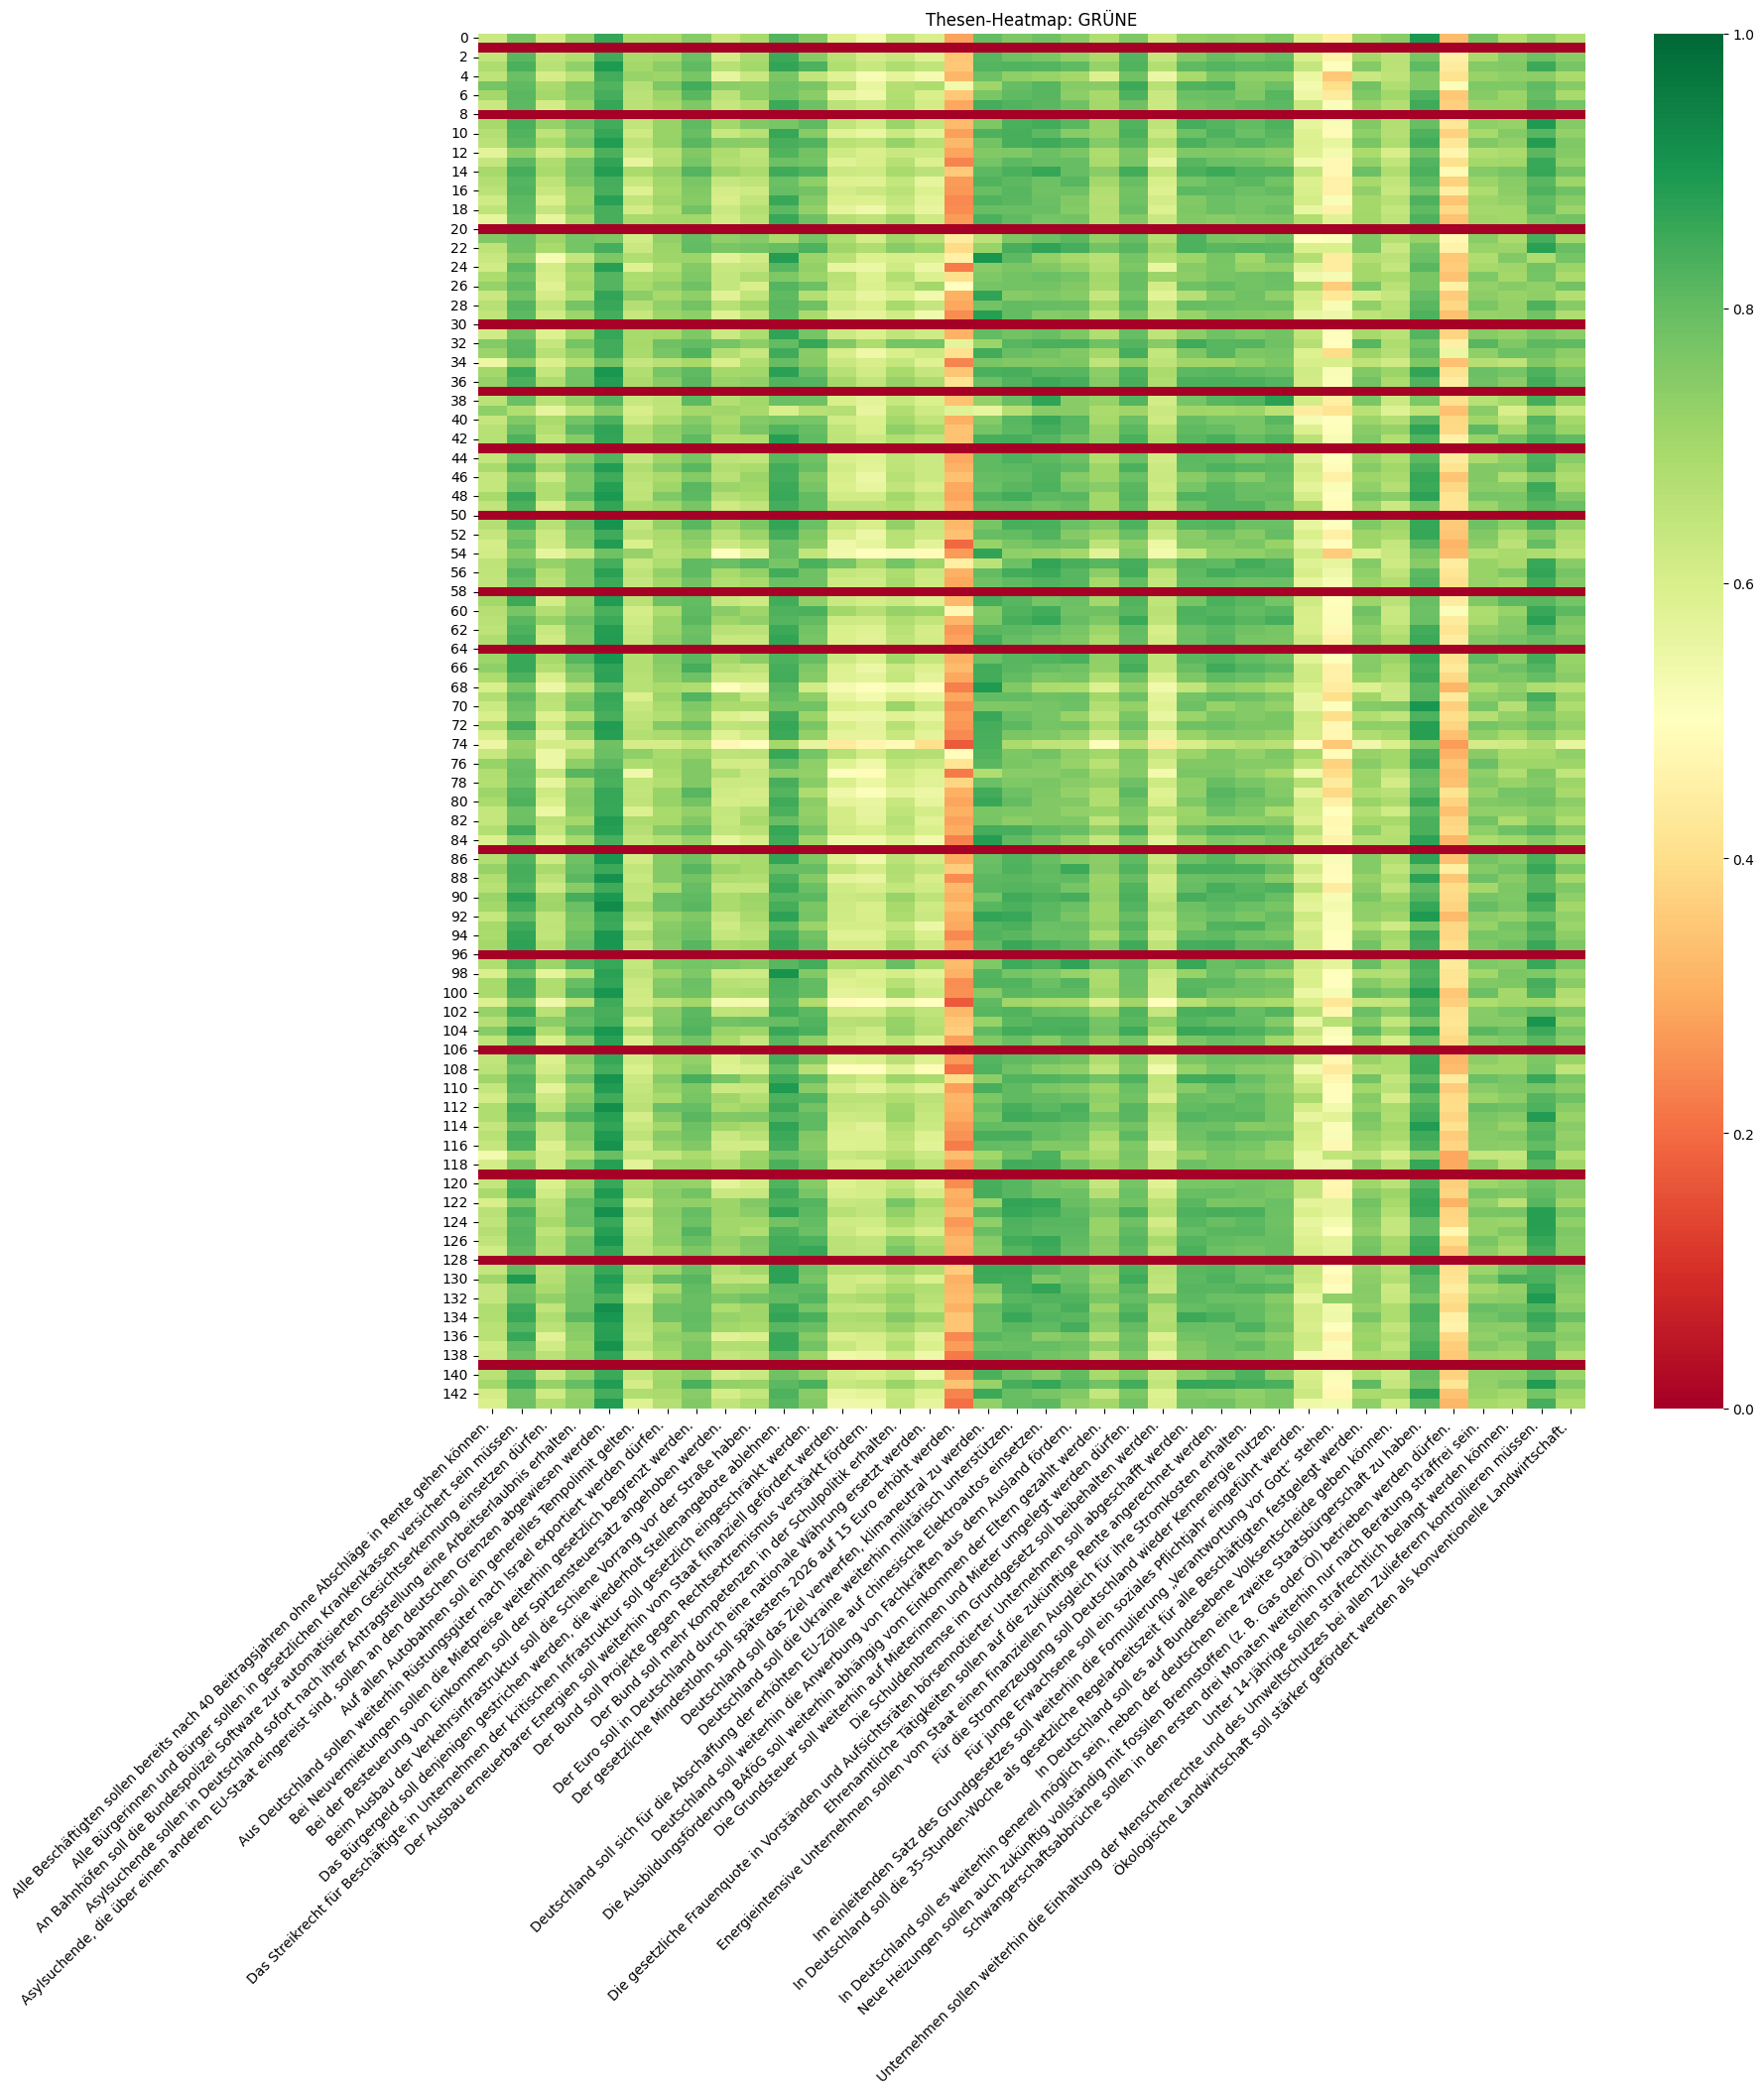

C:\Users\lnieb\AppData\Local\Temp\ipykernel_2656\865680615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  party_df.dropna(inplace=True)
C:\Users\lnieb\AppData\Local\Temp\ipykernel_2656\865680615.py:13: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity_score = party_these_doc.similarity(label_these_doc)


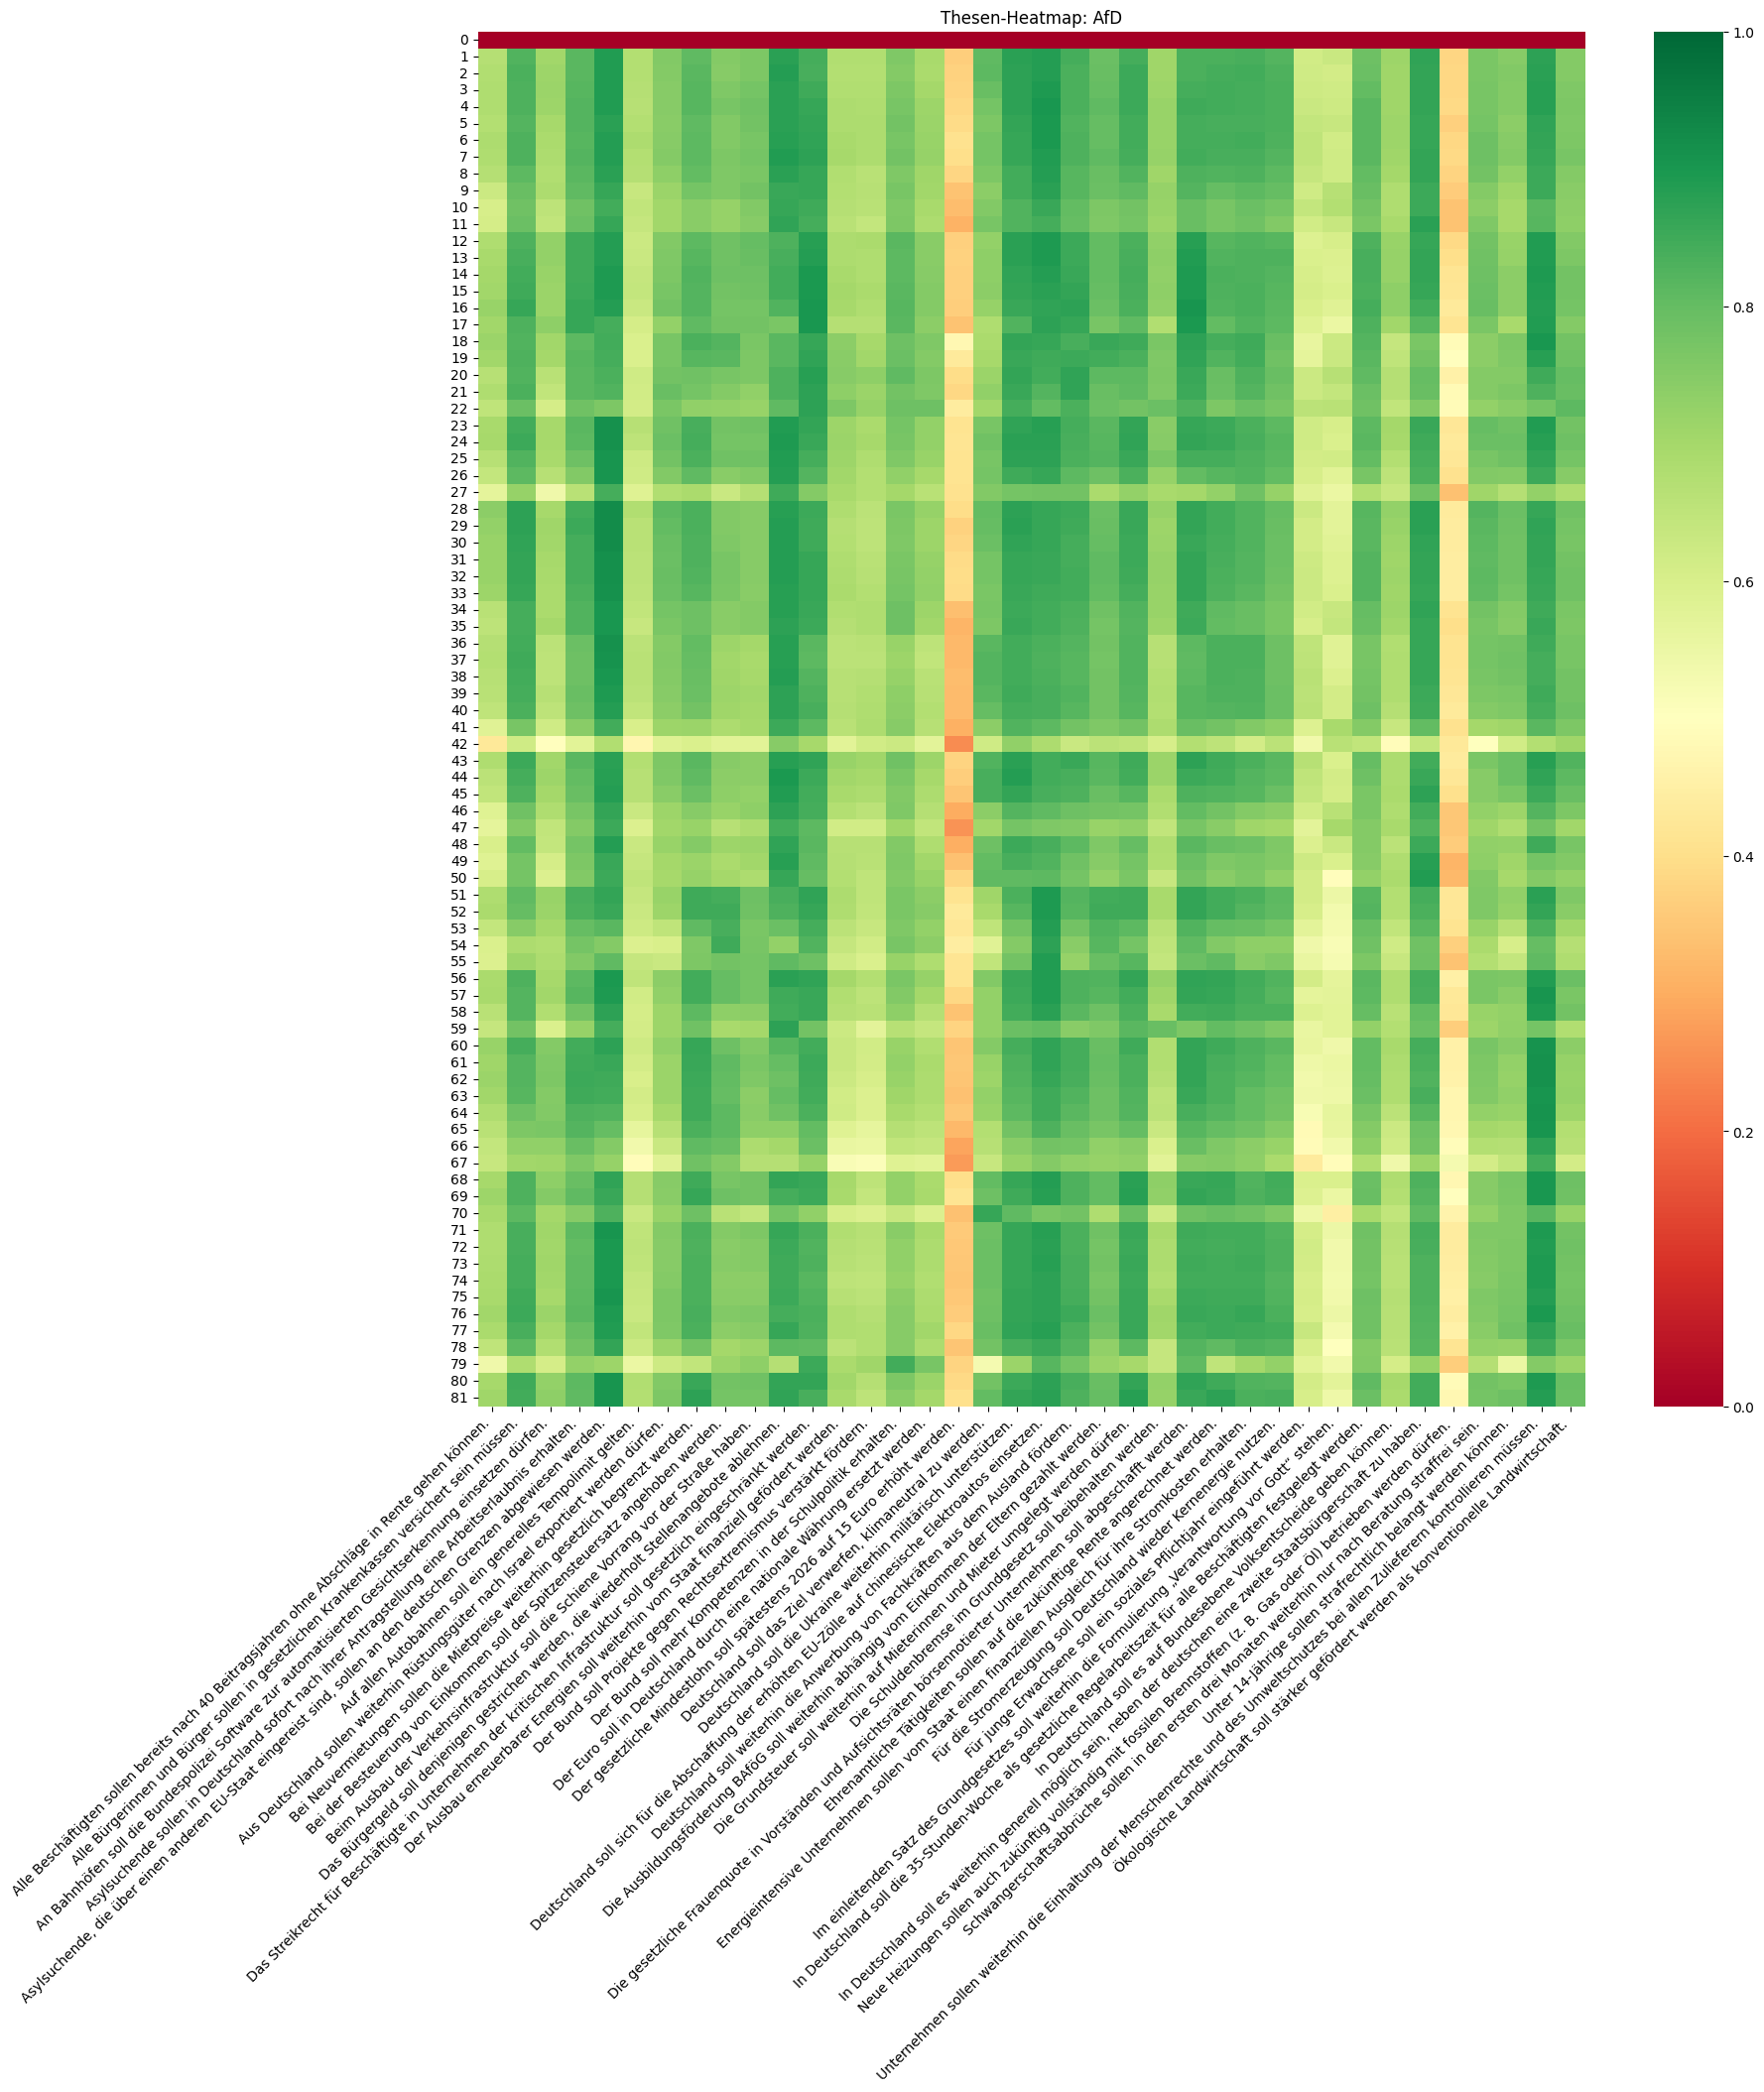

C:\Users\lnieb\AppData\Local\Temp\ipykernel_2656\865680615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  party_df.dropna(inplace=True)


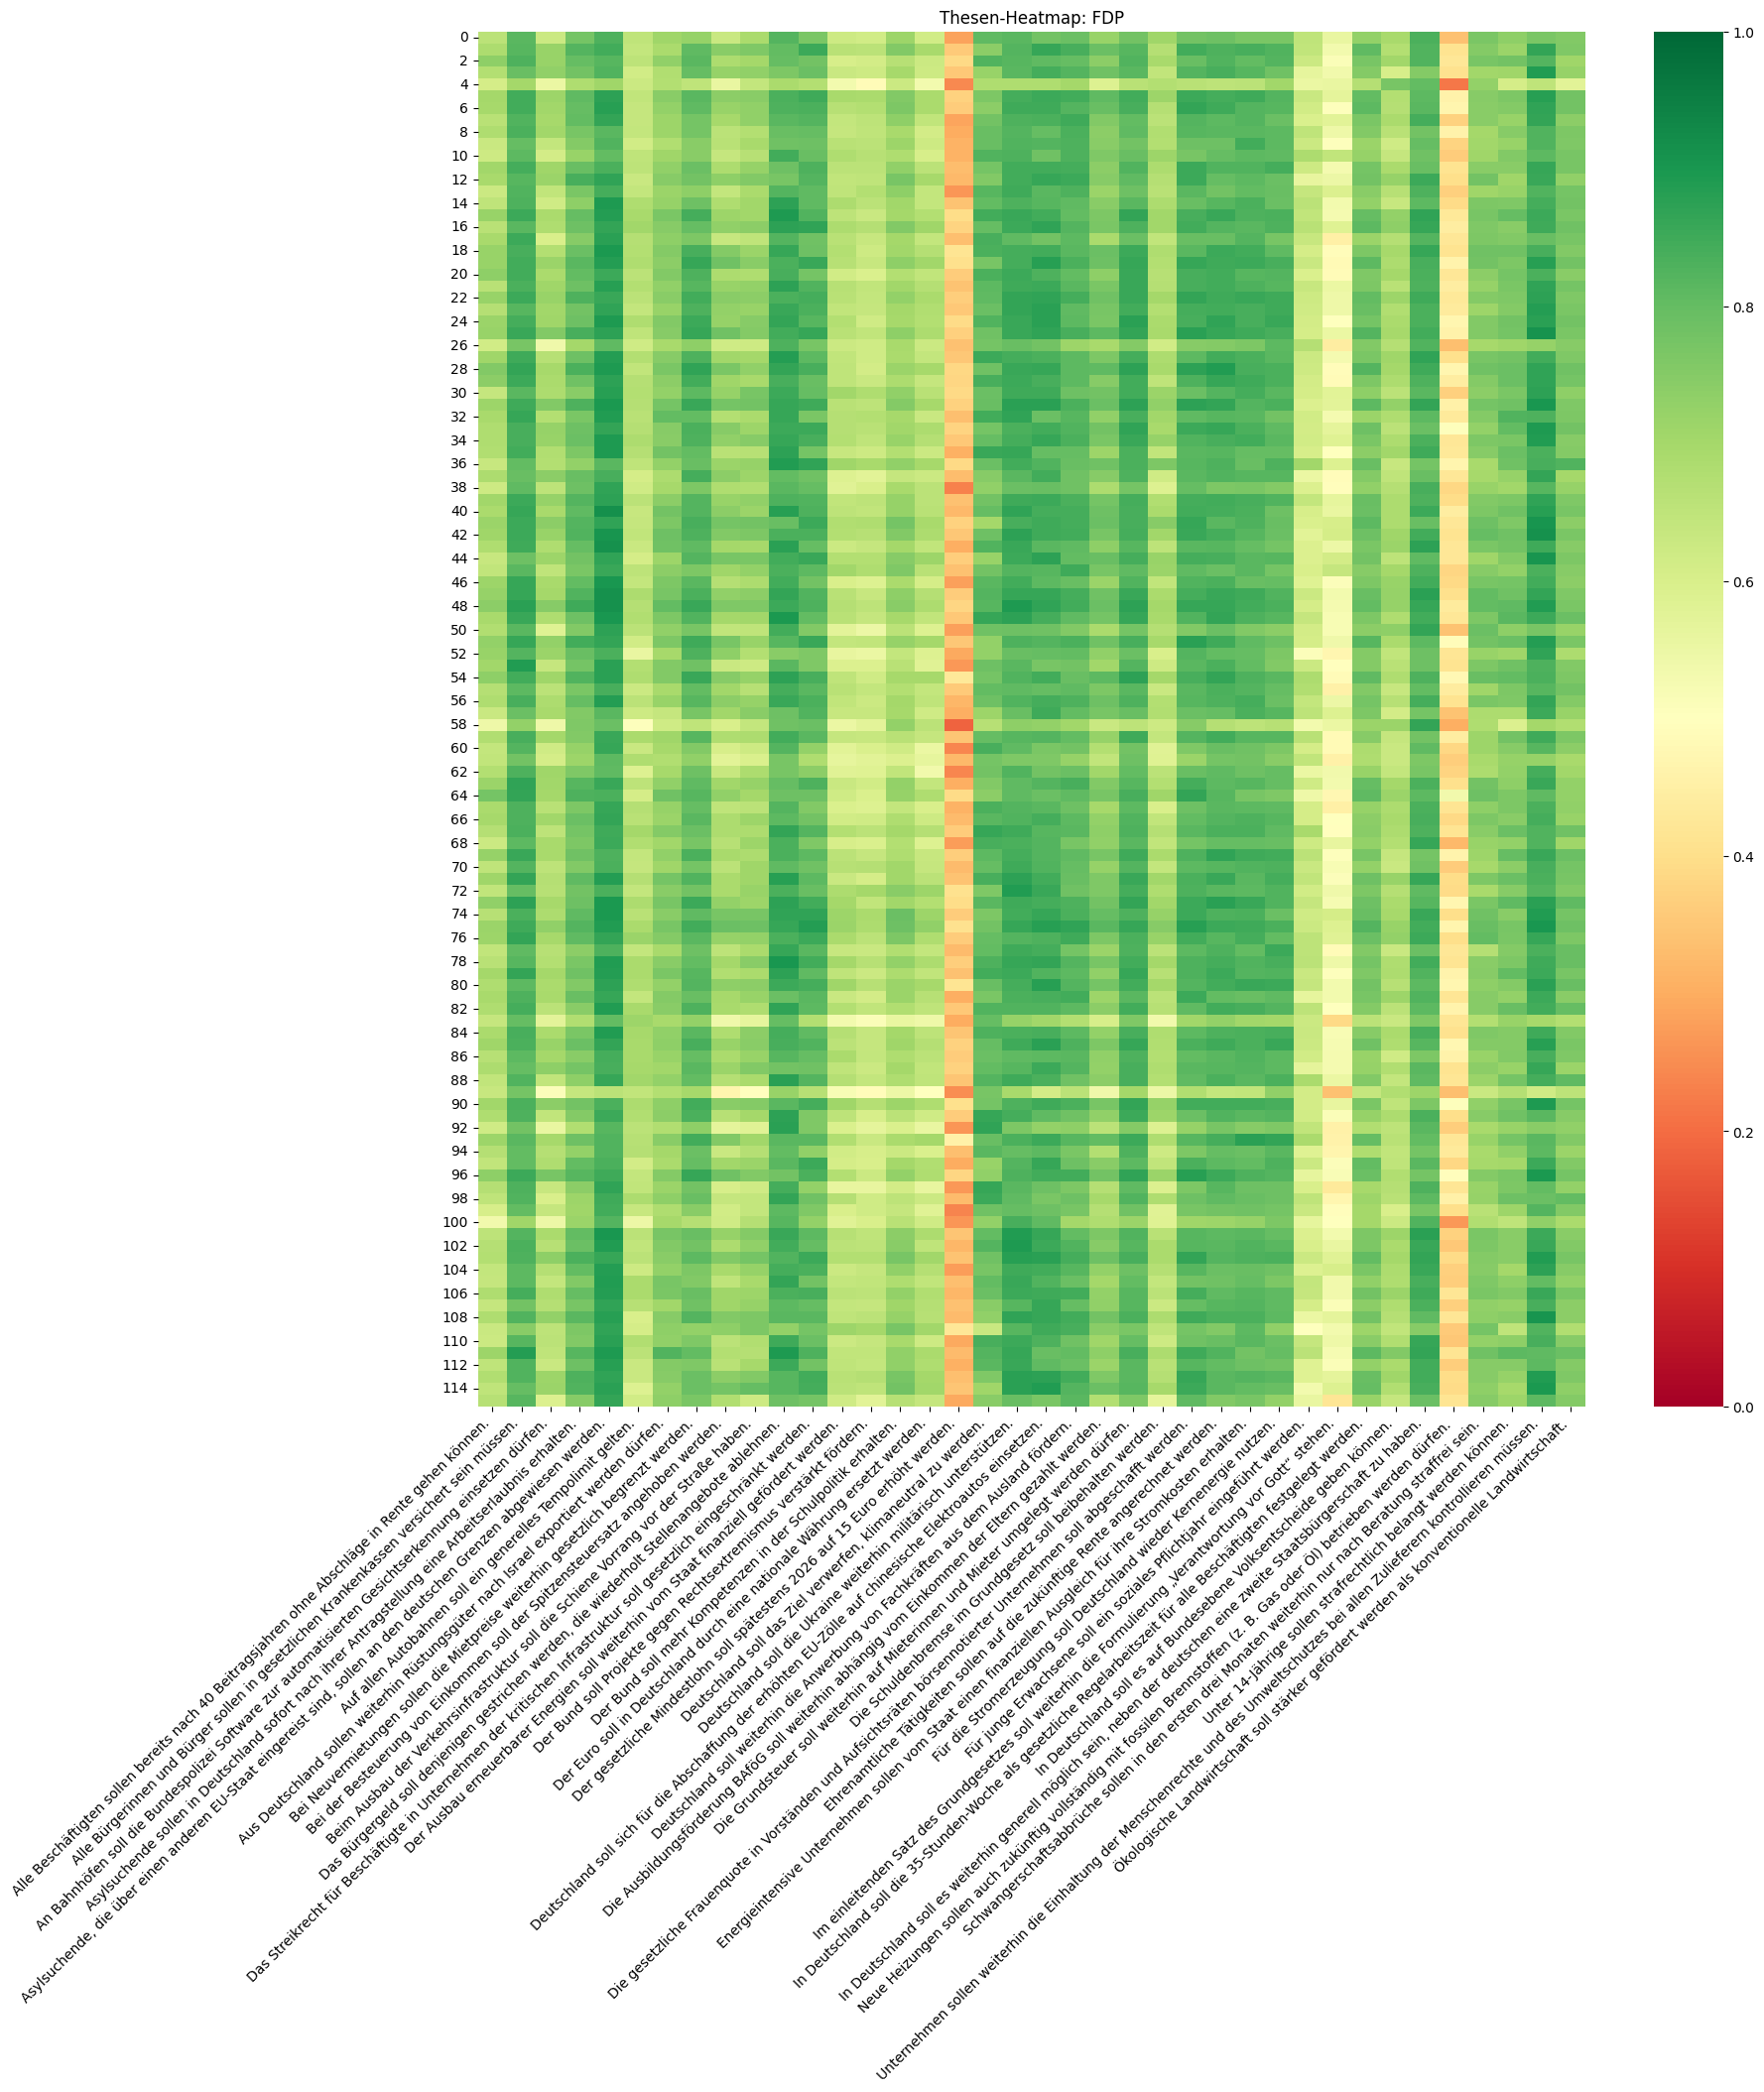

C:\Users\lnieb\AppData\Local\Temp\ipykernel_2656\865680615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  party_df.dropna(inplace=True)


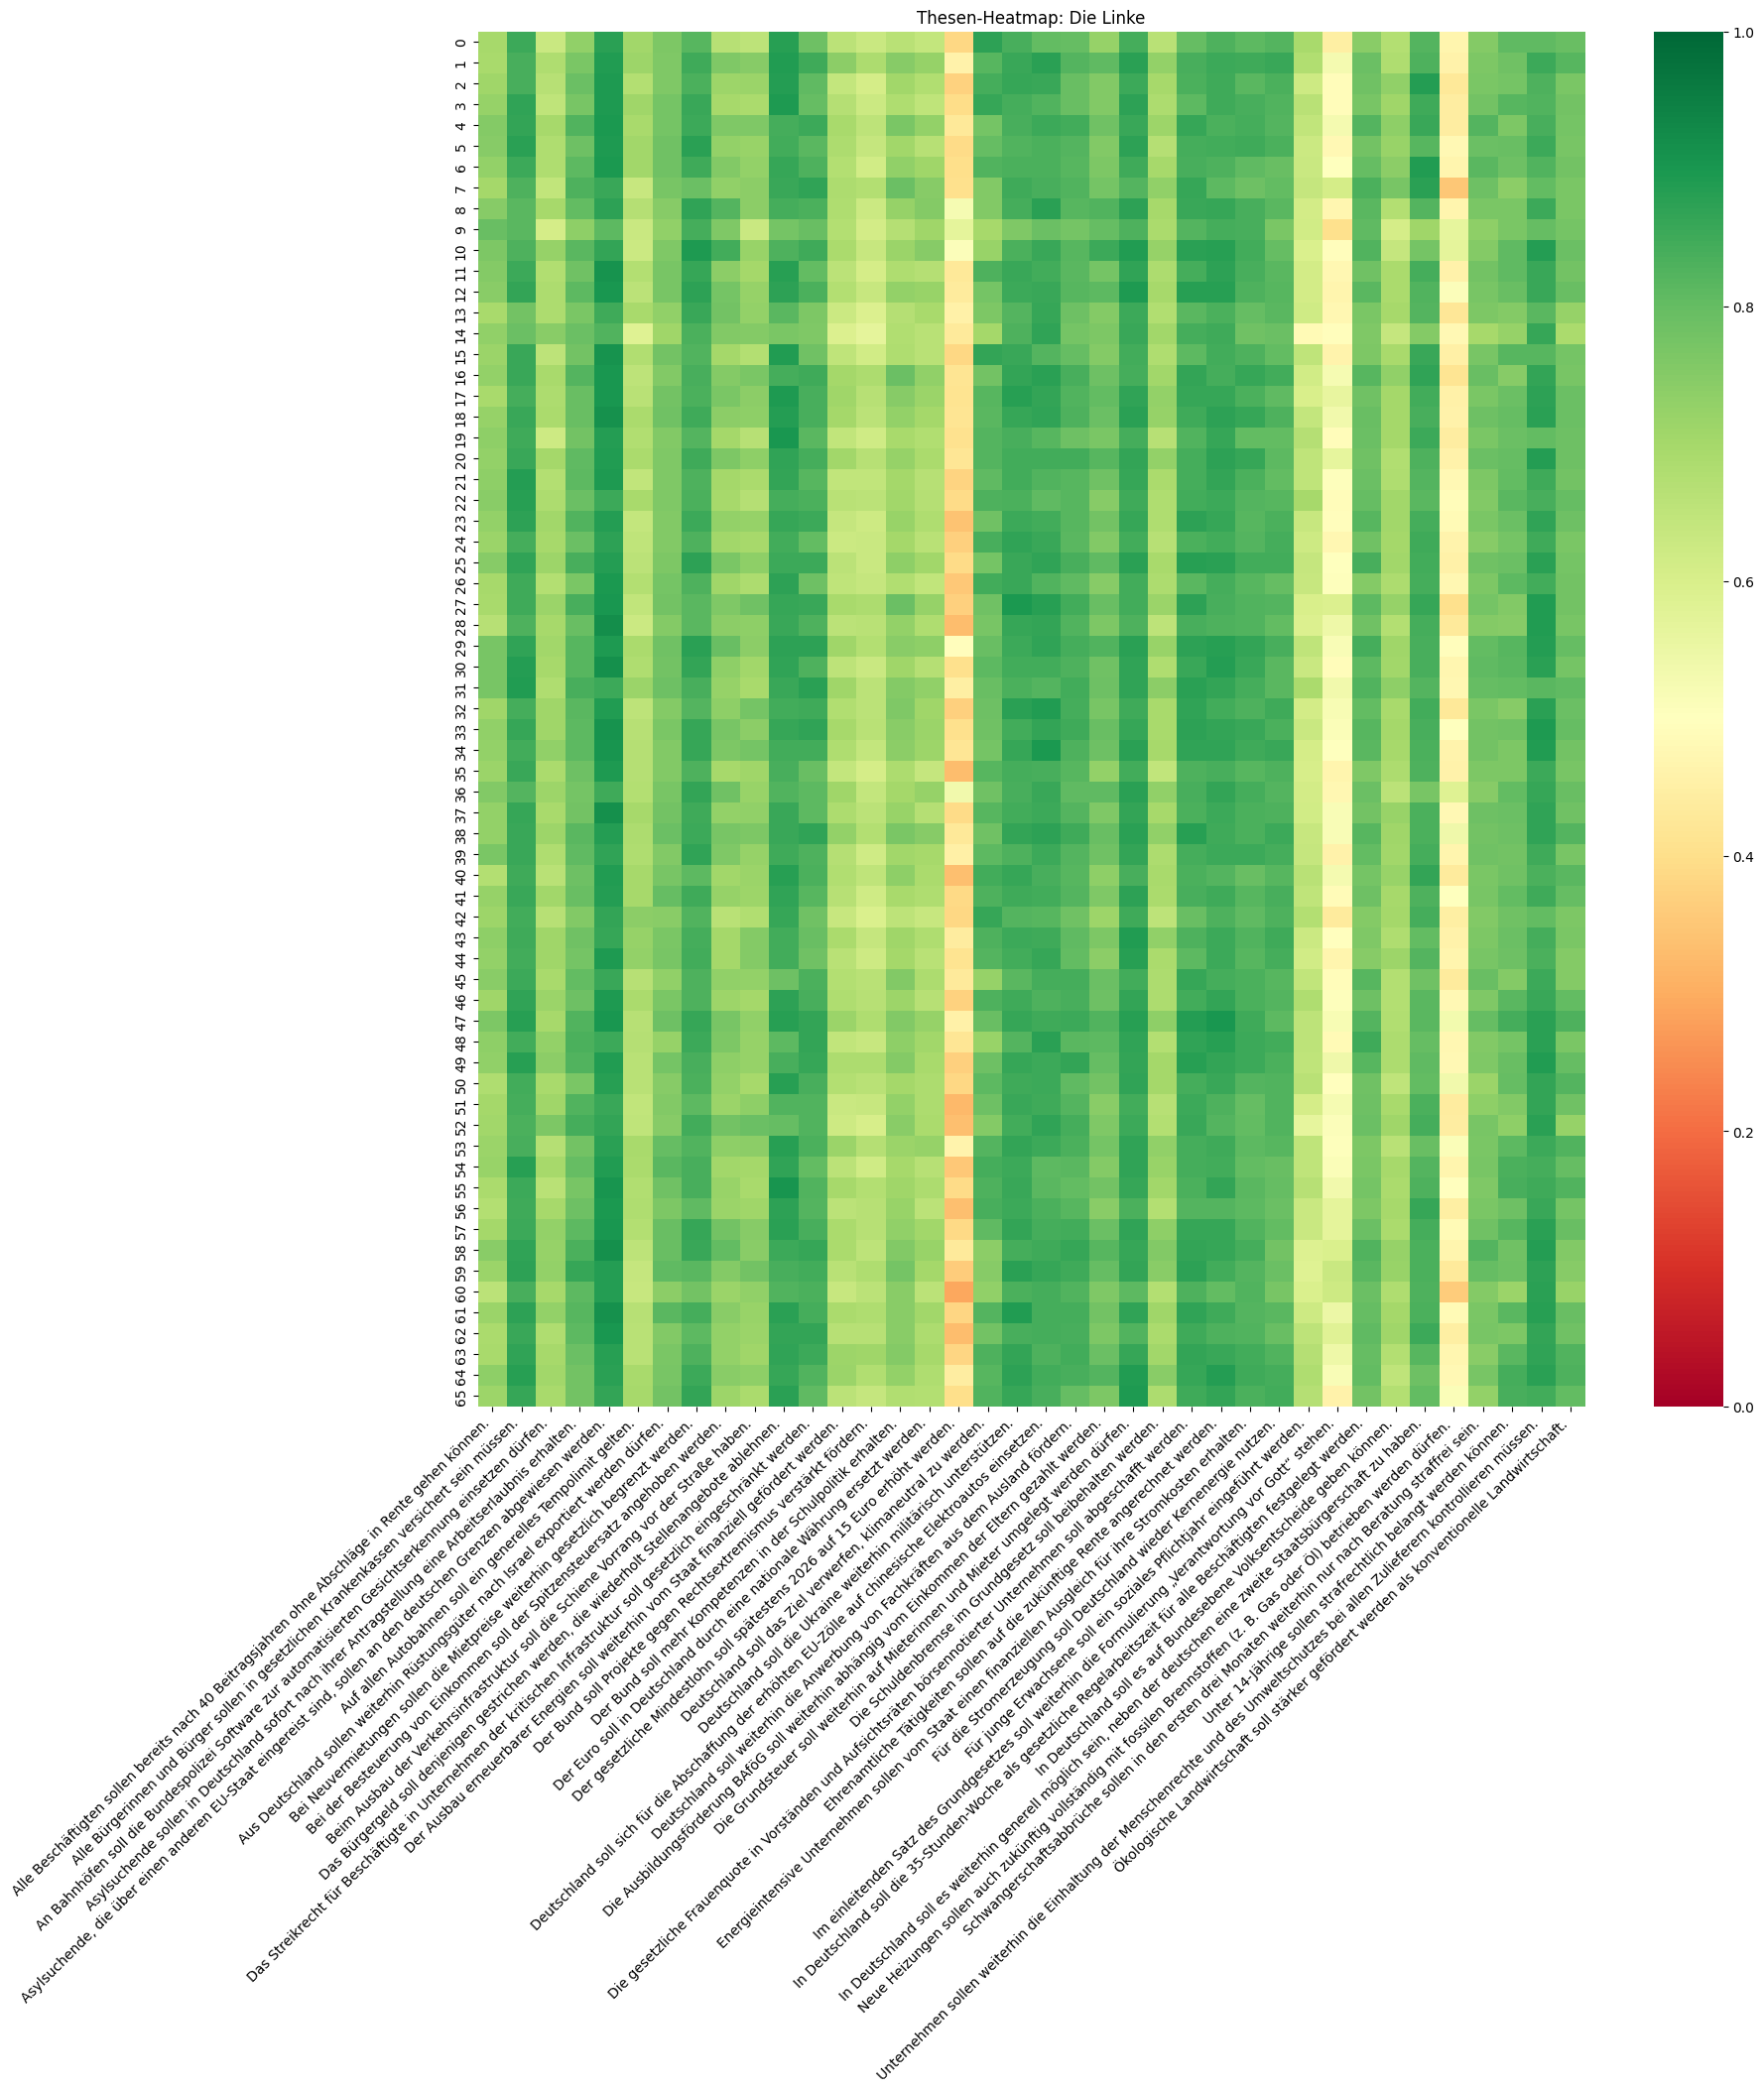

In [97]:
for party_str in parties_list:
    party_df = all_party_textes_df[all_party_textes_df['Party'] == party_str]
    party_df.dropna(inplace=True)
    party_these_list = party_df['Text'].to_list()

    similarity_df = pd.DataFrame(columns=['party_these']+Labled_theses_list)

    for party_these in party_these_list:
        party_these_doc = nlp(party_these)
        row = [party_these]
        for label_these in Labled_theses_list:
            label_these_doc = nlp(label_these)
            similarity_score = party_these_doc.similarity(label_these_doc)
            row = row + [similarity_score]
        similarity_df.loc[len(similarity_df)] = row

    plt.figure(figsize=(18,18))
    sns.heatmap(similarity_df[Labled_theses_list], 
                cmap='RdYlGn', 
                annot= False,
                vmax= 1,
                vmin= 0,
                #yticklabels=similarity_df["party_these"]
                )
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Thesen-Heatmap: {party_str}")
    plt.show()

    predicted_theses_df[party_str] = similarity_df[Labled_theses_list].mean().tolist()

In [98]:
predicted_theses_df

These  CDU / CSU     GRÜNE  \
0   Alle Beschäftigten sollen bereits nach 40 Beit...   0.667803  0.591395   
1   Alle Bürgerinnen und Bürger sollen in gesetzli...   0.822905  0.726000   
2   An Bahnhöfen soll die Bundespolizei Software z...   0.659857  0.575388   
3   Asylsuchende sollen in Deutschland sofort nach...   0.745870  0.672358   
4   Asylsuchende, die über einen anderen EU-Staat ...   0.839076  0.771723   
5   Auf allen Autobahnen soll ein generelles Tempo...   0.679962  0.579422   
6   Aus Deutschland sollen weiterhin Rüstungsgüter...   0.733750  0.644311   
7   Bei Neuvermietungen sollen die Mietpreise weit...   0.786414  0.695441   
8   Bei der Besteuerung von Einkommen soll der Spi...   0.641448  0.592892   
9   Beim Ausbau der Verkehrsinfrastruktur soll die...   0.676155  0.606983   
10  Das Bürgergeld soll denjenigen gestrichen werd...   0.835981  0.740338   
11  Das Streikrecht für Beschäftigte in Unternehme...   0.750667  0.687866   
12  Der Ausbau erneuerbarer Energien soll weiterhi...   0.618807  0.551752   
13  Der Bund soll Projekte gegen Rechtsextremismus...   0.603740  0.534043   
14  Der Bund soll mehr Kompetenzen in der Schulpol...   0.656985  0.597299   
15  Der Euro soll in Deutschland durch eine nation...   0.601376  0.551147   
16  Der gesetzliche Mindestlohn soll spätestens 20...   0.331193  0.278465   
17  Deutschland soll das Ziel verwerfen, klimaneut...   0.834216  0.711191   
18  Deutschland soll die Ukraine weiterhin militär...   0.831908  0.722517   
19  Deutschland soll sich für die Abschaffung der ...   0.801065  0.714666   
20  Deutschland soll weiterhin die Anwerbung von F...   0.777899  0.699057   
21  Die Ausbildungsförderung BAföG soll weiterhin ...   0.705859  0.632217   
22  Die Grundsteuer soll weiterhin auf Mieterinnen...   0.828807  0.713376   
23  Die Schuldenbremse im Grundgesetz soll beibeha...   0.656421  0.564166   
24  Die gesetzliche Frauenquote in Vorständen und ...   0.784615  0.698569   
25  Ehrenamtliche Tätigkeiten sollen auf die zukün...   0.805555  0.712741   
26  Energieintensive Unternehmen sollen vom Staat ...   0.782983  0.700924   
27  Für die Stromerzeugung soll Deutschland wieder...   0.806975  0.693786   
28  Für junge Erwachsene soll ein soziales Pflicht...   0.628181  0.535975   
29  Im einleitenden Satz des Grundgesetzes soll we...   0.498404  0.441052   
30  In Deutschland soll die 35-Stunden-Woche als g...   0.723421  0.650525   
31  In Deutschland soll es auf Bundesebene Volksen...   0.683732  0.599444   
32  In Deutschland soll es weiterhin generell mögl...   0.818123  0.735798   
33  Neue Heizungen sollen auch zukünftig vollständ...   0.378589  0.349363   
34  Schwangerschaftsabbrüche sollen in den ersten ...   0.721111  0.661177   
35  Unter 14-Jährige sollen strafrechtlich belangt...   0.756550  0.656988   
36  Unternehmen sollen weiterhin die Einhaltung de...   0.797897  0.725860   
37  Ökologische Landwirtschaft soll stärker geförd...   0.731664  0.655180   

         SPD       AfD  Die Linke       FDP  
0   0.690440  0.657880   0.723209  0.677791  
1   0.840233  0.804710   0.853289  0.826898  
2   0.689113  0.681301   0.693732  0.677322  
3   0.789419  0.792572   0.799766  0.779097  
4   0.878285  0.855748   0.884340  0.859592  
5   0.659348  0.625263   0.673890  0.653930  
6   0.740441  0.726168   0.767678  0.733062  
7   0.811376  0.792885   0.841403  0.798880  
8   0.705173  0.745411   0.739651  0.696059  
9   0.715953  0.736687   0.723391  0.706570  
10  0.838171  0.833204   0.856464  0.832352  
11  0.814781  0.830352   0.829409  0.804841  
12  0.649259  0.664103   0.673807  0.645603  
13  0.638904  0.651211   0.645992  0.632432  
14  0.710239  0.741361   0.722810  0.703017  
15  0.654075  0.691830   0.692745  0.651070  
16  0.337454  0.362202   0.403661  0.336770  
17  0.799656  0.744059   0.798998  0.790210  
18  0.840458  0.830359   0.849464  0.833738  
19  0.836031  0.843594   0.847772  0.827175  
20  0.821094  0.810197   0.823378  0.80

In [99]:
Labled_theses_df

These        CDU / CSU  \
0   Alle Beschäftigten sollen bereits nach 40 Beit...  stimme nicht zu   
1   Alle Bürgerinnen und Bürger sollen in gesetzli...  stimme nicht zu   
2   An Bahnhöfen soll die Bundespolizei Software z...        stimme zu   
3   Asylsuchende sollen in Deutschland sofort nach...  stimme nicht zu   
4   Asylsuchende, die über einen anderen EU-Staat ...        stimme zu   
5   Auf allen Autobahnen soll ein generelles Tempo...  stimme nicht zu   
6   Aus Deutschland sollen weiterhin Rüstungsgüter...        stimme zu   
7   Bei Neuvermietungen sollen die Mietpreise weit...        stimme zu   
8   Bei der Besteuerung von Einkommen soll der Spi...  stimme nicht zu   
9   Beim Ausbau der Verkehrsinfrastruktur soll die...  stimme nicht zu   
10  Das Bürgergeld soll denjenigen gestrichen werd...        stimme zu   
11  Das Streikrecht für Beschäftigte in Unternehme...          neutral   
12  Der Ausbau erneuerbarer Energien soll weiterhi...        stimme zu   
13  Der Bund soll Projekte gegen Rechtsextremismus...        stimme zu   
14  Der Bund soll mehr Kompetenzen in der Schulpol...  stimme nicht zu   
15  Der Euro soll in Deutschland durch eine nation...  stimme nicht zu   
16  Der gesetzliche Mindestlohn soll spätestens 20...          neutral   
17  Deutschland soll das Ziel verwerfen, klimaneut...  stimme nicht zu   
18  Deutschland soll die Ukraine weiterhin militär...        stimme zu   
19  Deutschland soll sich für die Abschaffung der ...          neutral   
20  Deutschland soll weiterhin die Anwerbung von F...        stimme zu   
21  Die Ausbildungsförderung BAföG soll weiterhin ...        stimme zu   
22  Die Grundsteuer soll weiterhin auf Mieterinnen...        stimme zu   
23  Die Schuldenbremse im Grundgesetz soll beibeha...        stimme zu   
24  Die gesetzliche Frauenquote in Vorständen und ...  stimme nicht zu   
25  Ehrenamtliche Tätigkeiten sollen auf die zukün...  stimme nicht zu   
26  Energieintensive Unternehmen sollen vom Staat ...        stimme zu   
27  Für die Stromerzeugung soll Deutschland wieder...        stimme zu   
28  Für junge Erwachsene soll ein soziales Pflicht...        stimme zu   
29  Im einleitenden Satz des Grundgesetzes soll we...        stimme zu   
30  In Deutschland soll die 35-Stunden-Woche als g...  stimme nicht zu   
31  In Deutschland soll es auf Bundesebene Volksen...  stimme nicht zu   
32  In Deutschland soll es weiterhin generell mögl...  stimme nicht zu   
33  Neue Heizungen sollen auch zukünftig vollständ...        stimme zu   
34  Schwangerschaftsabbrüche sollen in den ersten ...        stimme zu   
35  Unter 14-Jährige sollen strafrechtlich belangt...        stimme zu   
36  Unternehmen sollen weiterhin die Einhaltung de...  stimme nicht zu   
37  Ökologische Landwirtschaft soll stärker geförd...  stimme nicht zu   

              GRÜNE              SPD              AfD        Die Linke  \
0   stimme nicht zu  stimme nicht zu  stimme nicht zu        stimme zu   
1         stimme zu        stimme zu  stimme nicht zu        stimme zu   
2   stimme nicht zu  stimme nicht zu        stimme zu  stimme nicht zu   
3         stimme zu        stimme zu  stimme nicht zu        stimme zu   
4   stimme nicht zu  stimme nicht zu        stimme zu  stimme nicht zu   
5         stimme zu        stimme zu  stimme nicht zu        stimme zu   
6         stimme zu        stimme zu          neutral  stimme nicht zu   
7         stimme zu        stimme zu  stimme nicht zu        stimme zu   
8         stimme zu        stimme zu  stimme nicht zu        stimme zu   
9         stimme zu        stimme zu  stimme nicht zu        stimme zu   
10  stimme nicht zu        stimme zu        stimme zu  stimme nicht zu   
11  stimme nicht zu  stimme nicht zu        stimme zu  stimme nicht zu   
12        stimme zu        stimme zu  stimme nicht zu        stimme zu   
13        stimme zu        stimme zu  stimme nicht zu        stimme zu   
14        stimme zu        stimme zu  stimme nicht 